# Problem Statement

People with little or no credit history make it difficult for loan providers to grant loans to them. As a result, some customers take advantage of it by defaulting. Let's say we are employed by a consumer finance company that specializes in offering different kinds of loans to clients. In this case, we would use an approach known as exploratory data analysis (EDA) to look for patterns in the data. This will guarantee that the loan applicants are not turned down and that they are able to repay the loan.

### Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)

### Loading the Application Dataset

In [2]:
df = pd.read_csv("C:/Users/Arbaaz/Downloads/IIIT-Data Science program/EDA_Assignment_Solution/application_data.csv")

In [3]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
df.shape

(307511, 122)

In [5]:
df.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [7]:
100*df.isnull().mean()

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

### Missing value check

In [8]:
# Checking the percenatge of missing values

temp=(100*df.isnull().sum()/df.shape[0]).reset_index().rename(columns={"index":"column_name",0:"% missing"})
drop_cols = list(temp[temp["% missing"]>=40]["column_name"])

In [9]:
# Let's drop the columns values greater than 40%

df = df.drop(drop_cols, axis=1)

In [10]:
# Again checking all the null values in df

100*df.isnull().mean()

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

As we can see that the columns greater than 40% missing values has been droped

### Handeling Missing Values

In [11]:
# Checking the missing values in AMT_ANNUITY
df.AMT_ANNUITY.isnull().sum()

12

In [12]:
# AMT_ANNUITY column has 12 missing values as this column is numerical we can use Mean/Median method
med=df["AMT_ANNUITY"].median()
df["AMT_ANNUITY"]=df["AMT_ANNUITY"].fillna(med)

In [13]:
# Again checking the missing values in AMT_ANNUITY
df.AMT_ANNUITY.isnull().sum()

0

In [14]:
# Checking the missing values in AMT_GOODS_PRICE
df.AMT_GOODS_PRICE.isnull().sum()

278

In [15]:
# AMT_ANNUITY column has 278 missing values as this column is also numerical we can use Mean/Median method
med=df["AMT_GOODS_PRICE"].median()
df["AMT_GOODS_PRICE"]=df["AMT_GOODS_PRICE"].fillna(med)

In [16]:
# Agian checking the missing values in AMT_GOODS_PRICE
df.AMT_GOODS_PRICE.isnull().sum()

0

In [17]:
# Checking the missing values in NAME_TYPE_SUITE
df.NAME_TYPE_SUITE.isnull().sum()

1292

In [18]:
df.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [19]:
# NAME_TYPE_SUITE column has 1292 missing values as this column is categorical so we can use Mode on this
# Checking the mode of NAME_TYPE_SUITE in df
mod=df.NAME_TYPE_SUITE.mode()[0]
mod

'Unaccompanied'

In [20]:
# Filling the missing values with mode values of NAME_TYPE_SUITE in df
df.NAME_TYPE_SUITE.fillna(mod, inplace= True)
df.NAME_TYPE_SUITE.value_counts(normalize= True)

Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64

As we can see that in NAME_TYPE_SUITE. value_counts the percenatge has been incresed for "Unaccompanied" column.

In [21]:
# Checking the percentange and missing values in CODE_GENDER
df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In this XNA means missing value and there are total of 4 missing values so we can fill XNA with "F"

In [22]:
df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'

In [23]:
# Again checking value_counts for CODE_GENDER column
df.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [24]:
# Checking the percentange and missing values in ORGANIZATION_TYPE
df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In this we have total of 55374 of XNA values so we can drop them

In [25]:
# Dropping all the XNA rows in ORGANIZATION_TYPE
df=df.drop(df.loc[df['ORGANIZATION_TYPE']=='XNA'].index)

In [26]:
# Again checking the ORGANIZTION_TYPE column
df.ORGANIZATION_TYPE.value_counts(normalize=True)

Business Entity Type 3    0.269663
Self-employed             0.152346
Other                     0.066166
Medicine                  0.044393
Business Entity Type 2    0.041854
Government                0.041263
School                    0.035271
Trade: type 7             0.031059
Kindergarten              0.027287
Construction              0.026656
Business Entity Type 1    0.023733
Transport: type 4         0.021409
Trade: type 3             0.013850
Industry: type 9          0.013358
Industry: type 3          0.013001
Security                  0.012878
Housing                   0.011732
Industry: type 11         0.010724
Military                  0.010447
Bank                      0.009943
Agriculture               0.009733
Police                    0.009285
Transport: type 2         0.008741
Postal                    0.008555
Security Ministries       0.007829
Trade: type 2             0.007536
Restaurant                0.007183
Services                  0.006247
University          

In [27]:
# Checking the missing values in OCCUPATION_TYPE
df.OCCUPATION_TYPE.isnull().sum()

41019

In [28]:
df.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.261399
Sales staff              0.152057
Core staff               0.130590
Managers                 0.101228
Drivers                  0.088117
High skill tech staff    0.053904
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022030
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

As we can see that we have 96391 missing values in OCCUPATION_TYPE and we can leave the null values as it is this won't effect the dataset

In [29]:
# Checking missing for EXT_SOURCE_2 and EXT_SOURCE_3 
df.EXT_SOURCE_2.describe()

count    2.516330e+05
mean     5.161387e-01
std      1.899230e-01
min      8.173617e-08
25%      3.982912e-01
50%      5.670569e-01
75%      6.638953e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [30]:
df.EXT_SOURCE_3.describe()

count    202241.000000
mean          0.500341
std           0.196006
min           0.000527
25%           0.357293
50%           0.522697
75%           0.657784
max           0.893976
Name: EXT_SOURCE_3, dtype: float64

In EXT_SOURCE_3 has more missing values than EXT_SOURCE_2 so we can drop the EXT_SOURCE_3 column

In [31]:
# Dropping EXT_SOURCE_3
df.drop("EXT_SOURCE_3", axis=1, inplace=True)

In [32]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

These are the columns where the observations is done on client's social surroundings for DPD (date past due) so we can leave their null values as it is these won't change anything in the dataset OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE

These columns refers to the financial company or other company which may had hit BUREAU to check credit score of the applicants. 
How many places is the applicant looking for loan parallely. How many such applications or loans were applied for and/or taken in last one year. This is an important indicator NaN can either signify connection between our Server and Bureau failed or the applicant has not got any loans. AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, MT_REQ_CREDIT_BUREAU_YEAR

In [33]:
# Checking all the columns using for loop
for i in df.columns:
    if i.startswith("AMT_REQ"):
        print(df[i].value_counts())
        print("\n")

0.0    216908
1.0      1318
2.0        46
3.0         8
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64


0.0    217072
1.0      1042
2.0        89
3.0        41
4.0        20
5.0         8
6.0         7
9.0         2
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64


0.0    211334
1.0      6670
2.0       172
3.0        51
4.0        25
6.0        15
5.0        10
8.0         2
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64


0.0     181050
1.0      27784
2.0       4797
3.0       1768
4.0        971
5.0        545
6.0        303
7.0        247
9.0        181
8.0        165
10.0       123
11.0       103
12.0        67
13.0        63
14.0        36
15.0        30
16.0        22
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64


0.0      177565
1.0       27412
2.0       11485
3.0        1359
4.0         372
5.0          51
6.0          22
8.0           7
7.0           6
261.0    

In this for loop it will check all the columns. 
The loop will check all the columns starting with "AMT_REQ" and it will display value_counts() 

In [34]:
# Using Imputation at once using mode() 
for i in df.columns:
    if i.startswith("AMT_REQ"):
        df[i].fillna(value=df[i].mode()[0], inplace=True)

In [35]:
# Again checking the null values for all the columns in df
100*df.isnull().mean()

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_TYPE_SUITE                 0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [36]:
# Deleting all the columns which are not necessary for the analysis
drop_cols = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
             'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
             'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
             'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
             'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
             'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(drop_cols, axis=1, inplace=True)

In [37]:
# Chaning the columns into numeric
numeric_cols = ['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION',
                'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

## Data Imbalance

TARGET Columns represents as 0 and 1.

0 = no payment difficulties
1 = payment difficulties

In [38]:
100*df.TARGET.value_counts(normalize=True)

0    91.340025
1     8.659975
Name: TARGET, dtype: float64

In above code we can see that 0 has 91% of the data as compared to 1

Let's see its graphical reprentation using bar plot

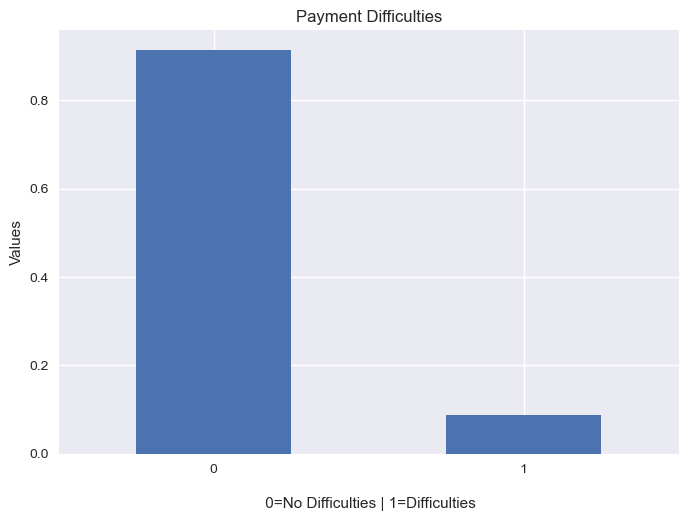

In [39]:
plt.style.use("seaborn")
plt.title("Payment Difficulties")
df.TARGET.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=0)
plt.xlabel("\n 0=No Difficulties | 1=Difficulties")
plt.ylabel("Values")
plt.show()

Above bar plot represents the TARGET variable. It shows that for no payment difficulties the value is greater than 80% and for payment difficulties the percentage is almost at 10%

## Segmented Univariate Analysis

### Segmentation on TARGET varaible

In [40]:
df_0 = df[df["TARGET"]==0]
df_1 = df[df["TARGET"]==1]

In [41]:
df_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
1             -291      Core staff                     MONDAY   
2            -2531        Laborers                     MONDAY   
3            -2437        Laborers                  WEDNESDAY   
4            -3458      Core staff                   THURSDAY   
5             -477        Laborers                  WEDNESDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   
5                       16                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   
5                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   
5                       0                       0                        0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
1                  School      0.622246                       1.0   
2              Government      0.555912                       0.0   
3  Business Entity Type 3      0.650442                

In [42]:
df_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
94      100112       1         Cash loans           M            Y   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
94               Y             0          315000.0    953460.0      64107.0   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
94         900000.0          Family  Commercial associate   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
94              Incomplete higher  Single / not married       With parents   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801       -9461           -637            -3648.0   
26                    0.018029      -18724          -2628            -6573.0   
40                    0.025164      -17482          -1262            -1182.0   
42                    0.007305      -13384          -3597              -45.0   
94                    0.030755      -10199          -2015            -4802.0   

    DAYS_ID_PUBLISH OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0             -2120        Laborers                  WEDNESDAY   
26            -1827   Cooking staff                     MONDAY   
40            -1029        Laborers                    TUESDAY   
42            -4409     Sales staff                   THURSDAY   
94            -1038             NaN                     SUNDAY   

    HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                        10                           0   
26                        9                           0   
40                        9                           0   
42                       11                           0   
94                       13                           0   

    REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                            0                            0   
26                           0                            0   
40                           0                            0   
42                           0                            0   
94                           0                            0   

    REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                        0                       0                        0   
26                       0                       0                        0   
40                       0                       0                        0   
42                       0                       0                        0   
94                       0                       1                        1   

         ORGANIZATION_TYPE  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
0   Business Entity Type 3      0.262949                       2.0   
26  Business Entity Type 3      0.548477     

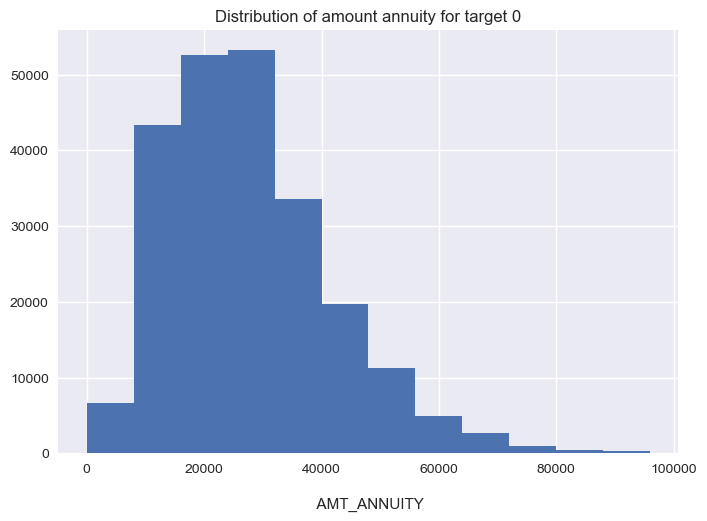

In [43]:
plt.style.use("seaborn")
bins=[i for i in range(0,100000,8000)]
plt.hist(df_0['AMT_ANNUITY'],bins=bins)
plt.xlabel("\n AMT_ANNUITY")
plt.title("Distribution of amount annuity for target 0")
plt.show()

The above histogram shows the data for TARGET=0 according to the AMT_ANNUITY column so the highest range is around 20000 

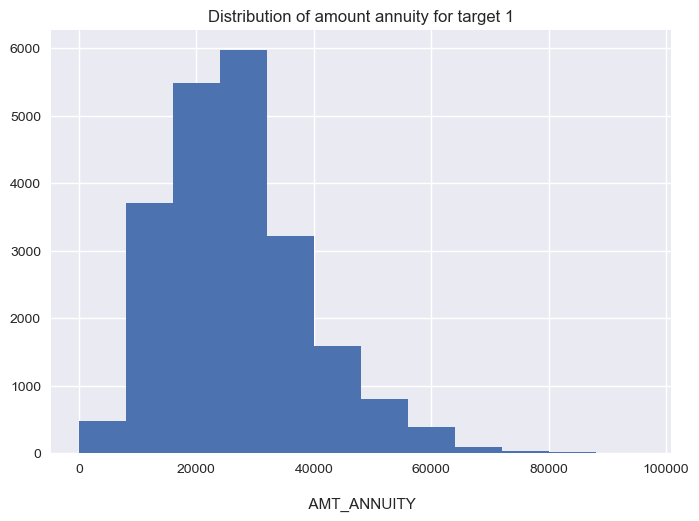

In [44]:
plt.style.use("seaborn")
bins=[i for i in range(0,100000,8000)]
plt.hist(df_1['AMT_ANNUITY'],bins=bins)
plt.xlabel("\n AMT_ANNUITY")
plt.title("Distribution of amount annuity for target 1")
plt.show()

The above histogram shows the data for TARGET=1 according to the AMT_ANNUITY column so the highest range is between 20000 and 40000

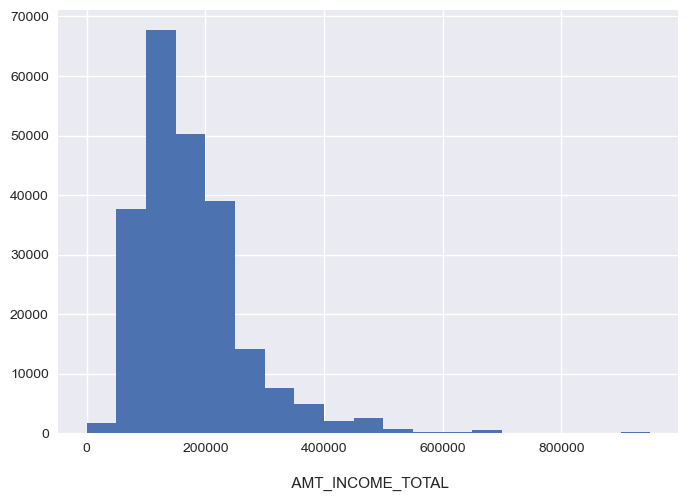

In [45]:
plt.style.use("seaborn")
bins=[i for i in range(0,1000000,50000)]
plt.hist(df_0['AMT_INCOME_TOTAL'],bins=bins)
plt.xlabel("\n AMT_INCOME_TOTAL")
plt.show()

The above histogram shows the data for TARGET=0 according to the AMT_INCOME_TOTAL column so the highest range is somewhere between 100000 and 200000

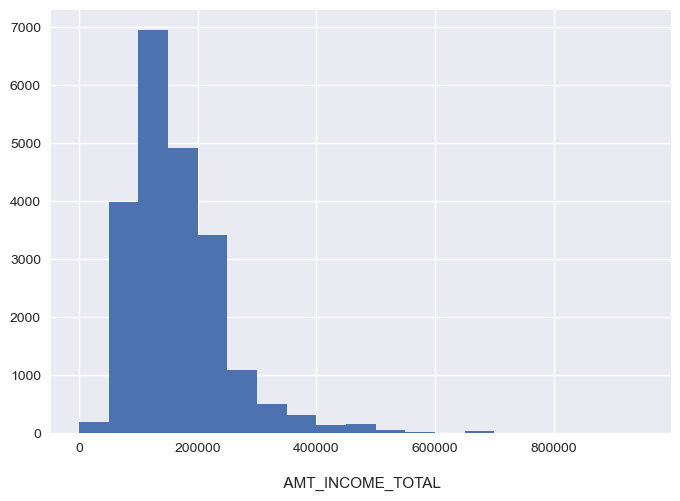

In [46]:
plt.style.use("seaborn")
bins=[i for i in range(0,1000000,50000)]
plt.hist(df_1['AMT_INCOME_TOTAL'],bins=bins)
plt.xlabel("\n AMT_INCOME_TOTAL")
plt.show()

The above histogram shows the data for TARGET=1 according to the AMT_INCOME_TOTAL column so the highest range is somewhere between 100000 and 200000 but the data bar travels till the range of almost 8000

## Outlier Check

### Outlier check for Target=0

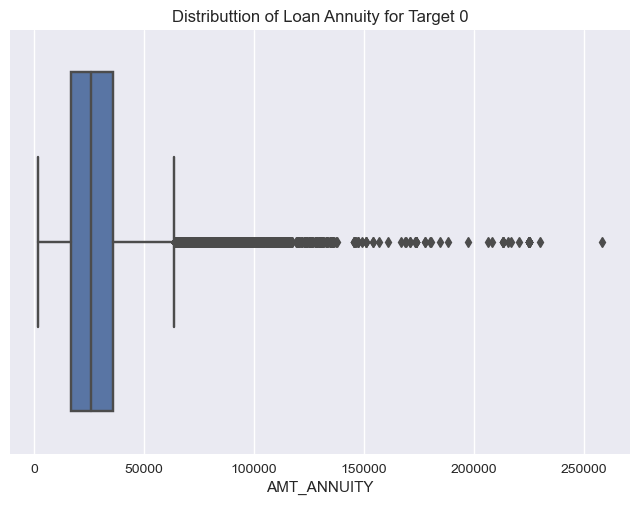

In [47]:
# Checking AMT_ANNUITY column for outliers
plt.style.use("seaborn")
sns.boxplot(df_0["AMT_ANNUITY"])
plt.title("Distributtion of Loan Annuity for Target 0")
plt.show()

We can conclude that from above boxplot we can see some outliers in the dataset. Moreover, the third quartile range is bigger than the first.

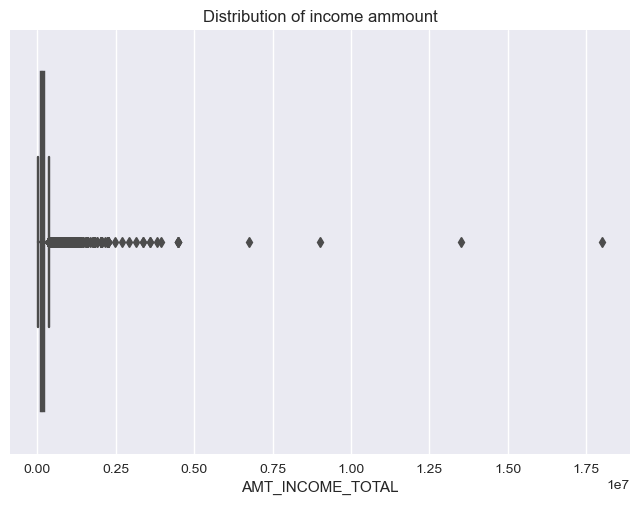

In [48]:
# Checking AMT_INCOME_TOTAL column for outliers
plt.style.use("seaborn")
sns.boxplot(df_0["AMT_INCOME_TOTAL"])
plt.title("Distribution of income ammount")
plt.show()

We can conclude that from above boxplot we can see there are maximum outliers in the dataset.

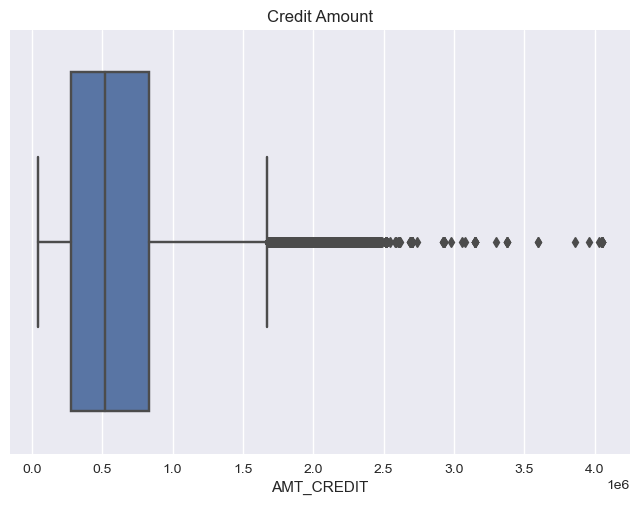

In [49]:
# Checking AMT_CREDIT column for outliers
plt.style.use("seaborn")
sns.boxplot(df_0["AMT_CREDIT"])
plt.title("Credit Amount")
plt.show()

We can conclude that from above boxplot we can see some outliers in the dataset. In addition, the third quartile range is bigger than the first.

### Oulier check for Target=1

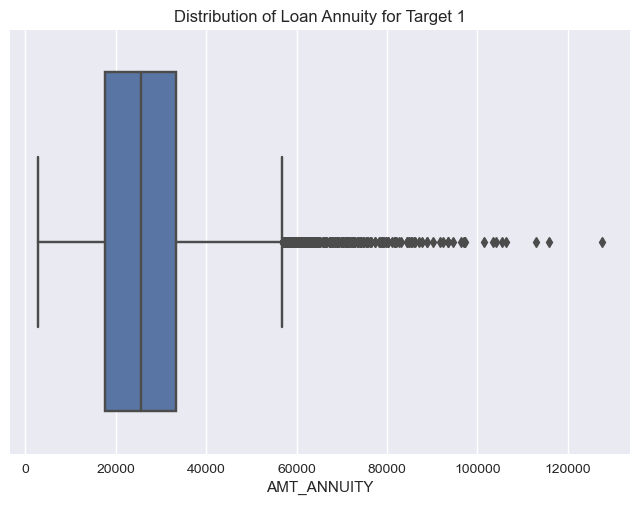

In [50]:
# Checking AMT_ANNUITY column for outliers
plt.style.use("seaborn")
sns.boxplot(df_1["AMT_ANNUITY"])
plt.title("Distribution of Loan Annuity for Target 1")
plt.show()

We can conclude that from above boxplot we can see some outliers in the dataset. Moreover, the first quartile range is bigger than the third.

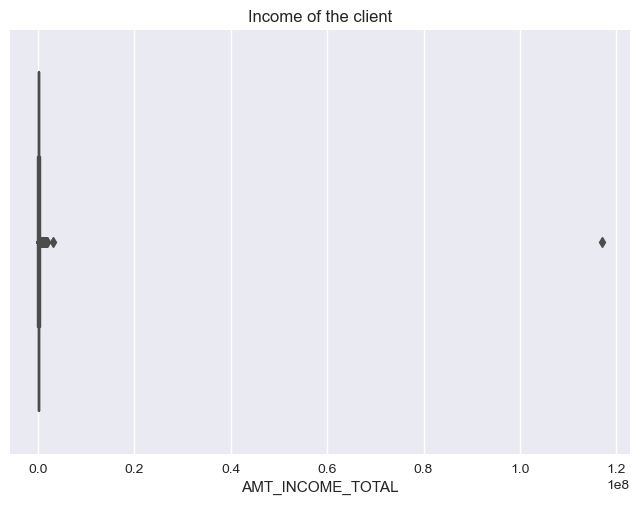

In [51]:
# Checking AMT_INCOME_TOTAL column for outliers
plt.style.use("seaborn")
sns.boxplot(df_1["AMT_INCOME_TOTAL"])
plt.title("Income of the client")
plt.show()

We can conclude that from above boxplot we can see maximum numbers of outliers in the dataset.

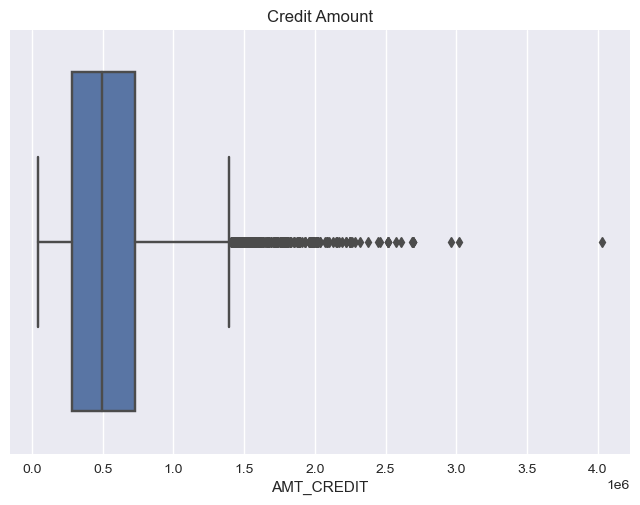

In [52]:
# Checking AMT_CREDIT column for outliers
plt.style.use("seaborn")
sns.boxplot(df_1["AMT_CREDIT"])
plt.title("Credit Amount")
plt.show()

We can conclude that from above boxplot we can see some outliers in the dataset. However, the first quartile range is bigger than the third.

## Univariate Analysis

### Categorical - Target 0 and Target -1

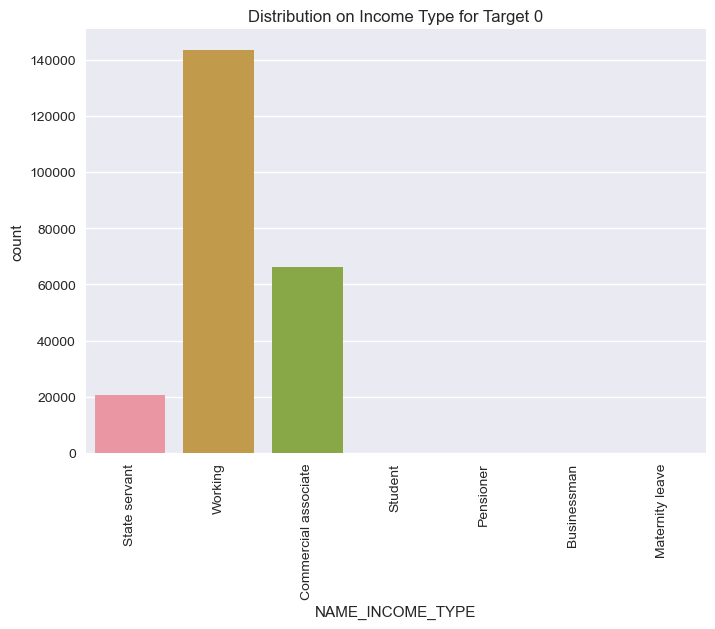

In [53]:
# Plotting for Income type
plt.style.use("seaborn")
sns.countplot(data=df_0, x="NAME_INCOME_TYPE")
plt.title("Distribution on Income Type for Target 0")
plt.xticks(rotation=90)
plt.show()

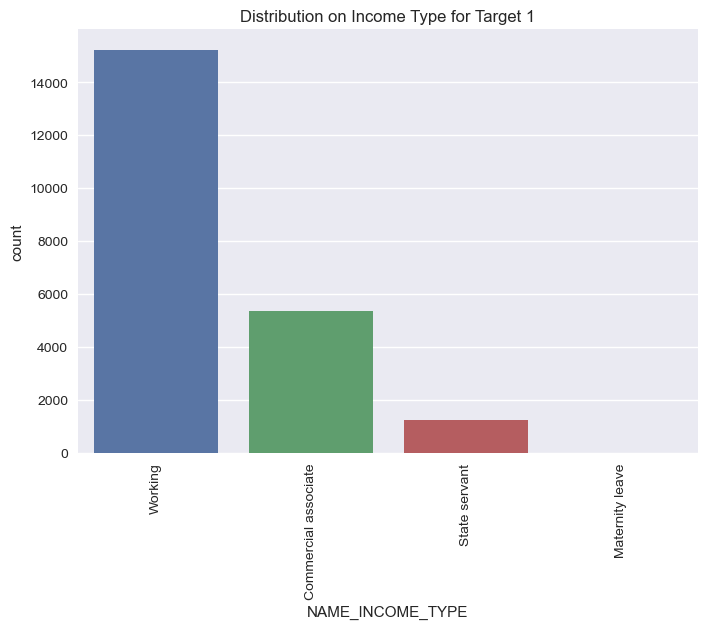

In [54]:
# Plotting for Income type
plt.style.use("seaborn")
sns.countplot(data=df_1, x="NAME_INCOME_TYPE")
plt.title("Distribution on Income Type for Target 1")
plt.xticks(rotation=90)
plt.show()

From the above graphs we can conclude that for traget-0 and target-1 the highest value is for working class but for target-0 the count is almost 140000 whihc is greater than target-1

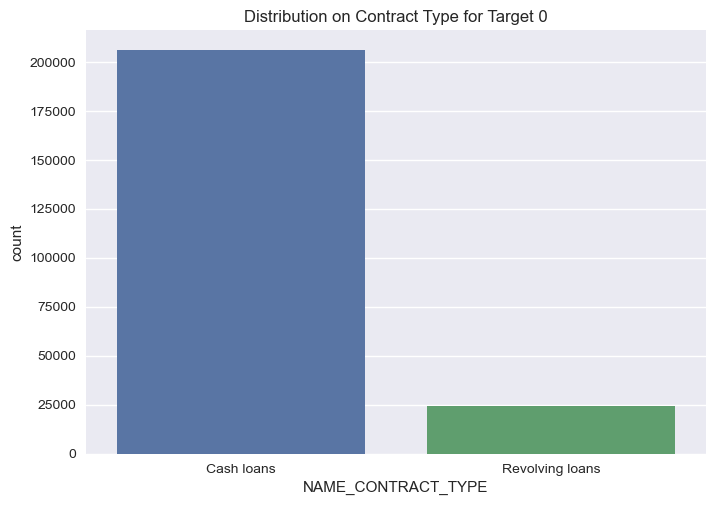

In [55]:
# Plotting for NAME_CONTRACT_TYPE
plt.style.use("seaborn")
sns.countplot(data=df_0, x="NAME_CONTRACT_TYPE")
plt.title("Distribution on Contract Type for Target 0")
plt.xticks(rotation=0)
plt.show()

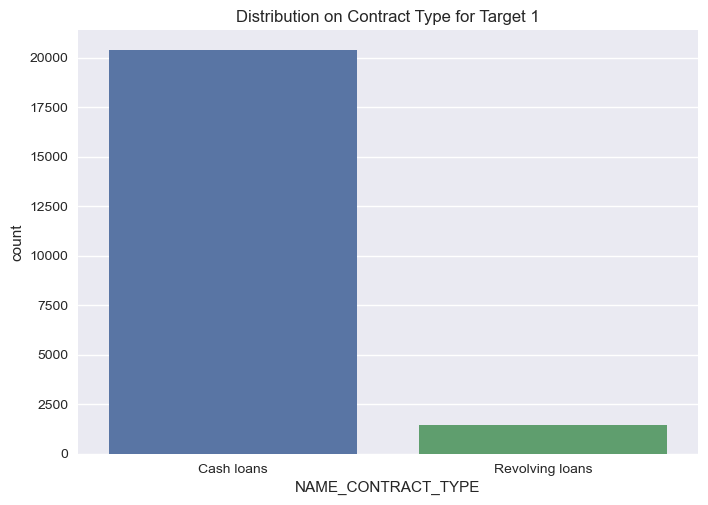

In [56]:
# Plotting for NAME_CONTRACT_TYPE
plt.style.use("seaborn")
sns.countplot(data=df_1, x="NAME_CONTRACT_TYPE")
plt.title("Distribution on Contract Type for Target 1")
plt.xticks(rotation=0)
plt.show()

In these graphs we can see that for target-0 and target-1 the cash loans are the highest than revolving loans but  for the both plots the counts are different.

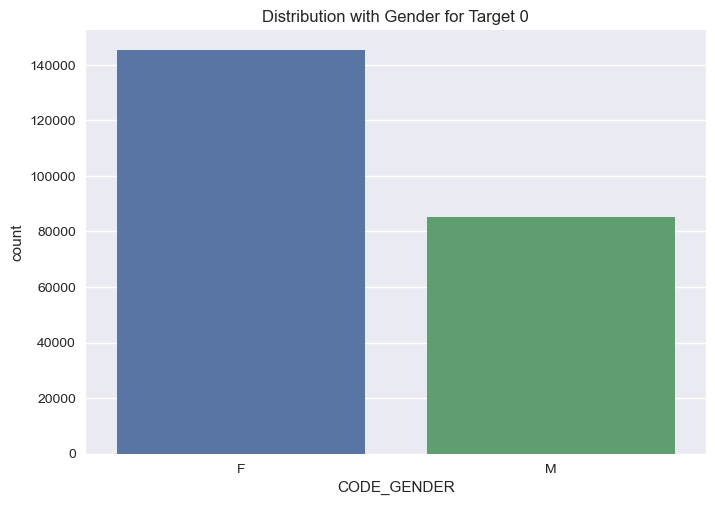

In [57]:
# Plotting for CODE_GENDER
plt.style.use("seaborn")
sns.countplot(data=df_0, x="CODE_GENDER")
plt.title("Distribution with Gender for Target 0")
plt.xticks(rotation=0)
plt.show()

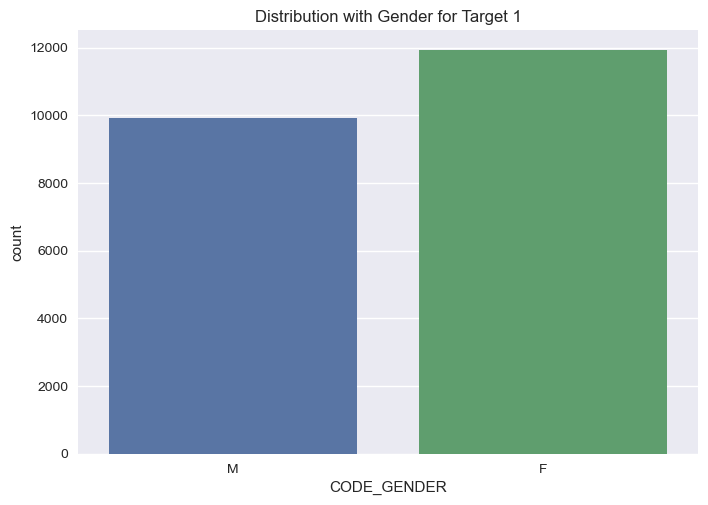

In [58]:
# Plotting for CODE_GENDER
plt.style.use("seaborn")
sns.countplot(data=df_1, x="CODE_GENDER")
plt.title("Distribution with Gender for Target 1")
plt.xticks(rotation=0)
plt.show()

We can see that for target-0 and target-1 Females are counts are more than Males 

### Bivariate Analysis

#### Numerical vs Numerical for Target-0

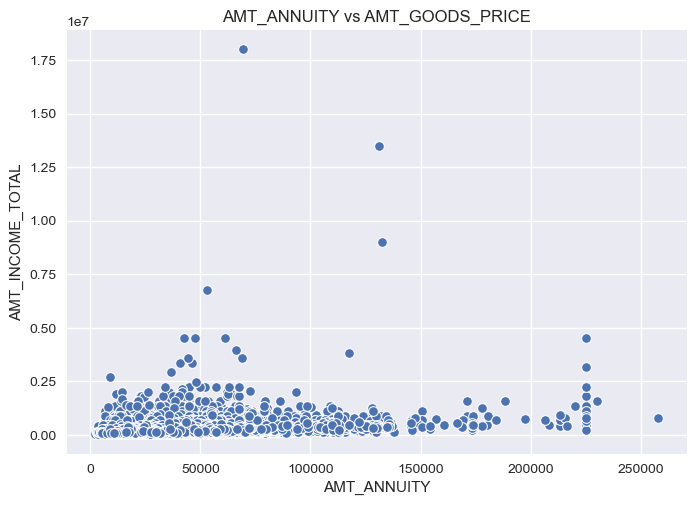

In [59]:
plt.style.use("seaborn")
sns.scatterplot(data=df_0, x="AMT_ANNUITY", y="AMT_INCOME_TOTAL")
plt.title("AMT_ANNUITY vs AMT_GOODS_PRICE")
plt.show()

From the above plot we can conclude that for columns AMT_ANNUITY has the majority of the counts is in the range of 50000 and 100000.

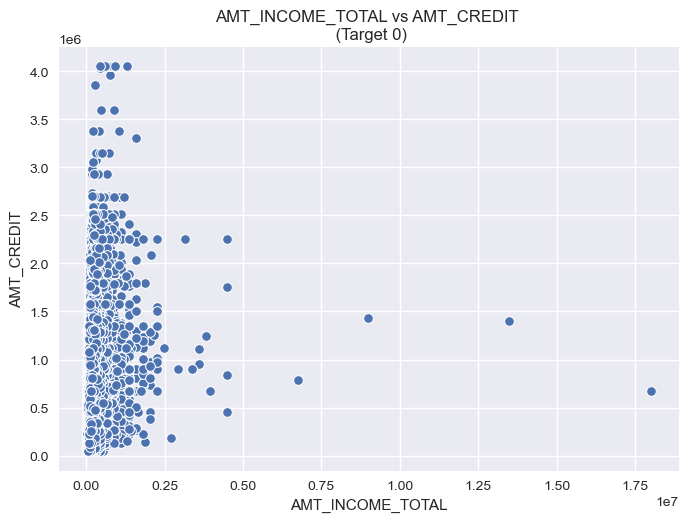

In [60]:
plt.style.use("seaborn")
sns.scatterplot(data=df_0, x="AMT_INCOME_TOTAL", y="AMT_CREDIT")
plt.title("AMT_INCOME_TOTAL vs AMT_CREDIT \n (Target 0)")
plt.show()

From above plots we can conclude that the AMT_INCOME_TOTAL as the highest range between 0.00 and 0.25 it goes straight upward.

### For Target-1

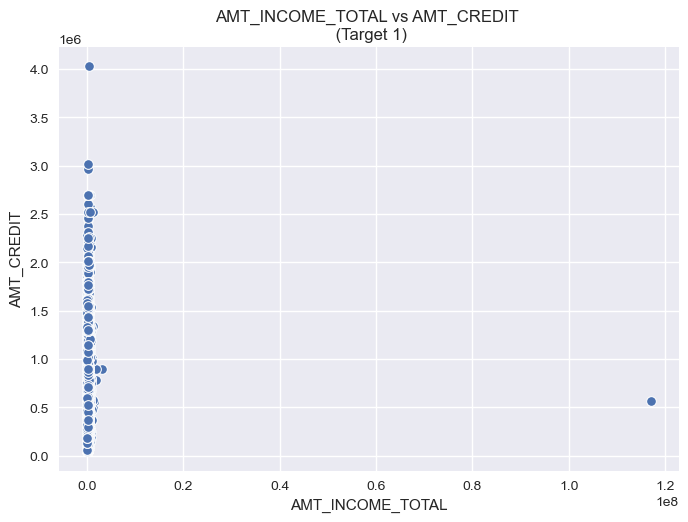

In [61]:
plt.style.use("seaborn")
sns.scatterplot(data=df_1, x="AMT_INCOME_TOTAL", y="AMT_CREDIT")
plt.title("AMT_INCOME_TOTAL vs AMT_CREDIT \n (Target 1)")
plt.show()

For the given scatterplot the AMT_INCOME_TOTAL increases with the AMT_CREDIT column as it grows linerly.

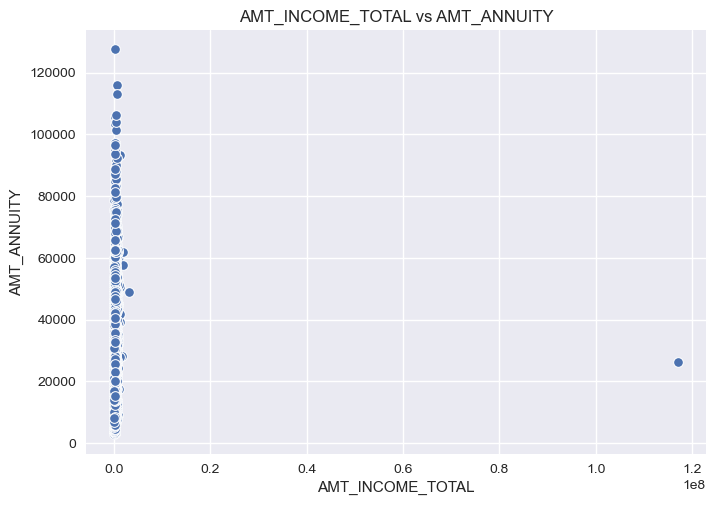

In [62]:
plt.style.use("seaborn")
sns.scatterplot(data=df_1, x="AMT_INCOME_TOTAL", y="AMT_ANNUITY")
plt.title("AMT_INCOME_TOTAL vs AMT_ANNUITY")
plt.show()

For the given scatterplot the AMT_INCOME_TOTAL increases with the AMT_ANNUITY column as it grows linerly.

#### Numerical vs Categorical for Target-0

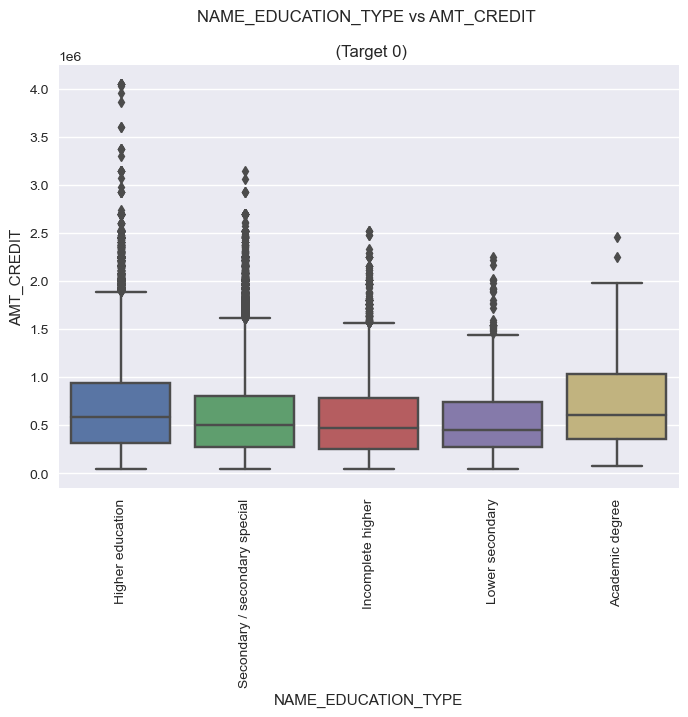

In [63]:
plt.style.use("seaborn")
sns.boxplot(data=df_0, x="NAME_EDUCATION_TYPE", y="AMT_CREDIT")
plt.title("NAME_EDUCATION_TYPE vs AMT_CREDIT \n\n (Target 0)")
plt.xticks(rotation=90)
plt.show()

From the above box plot we can conclude that Academic degree education is having higher number of credits than others. Also, higher education is having more outliers. Academic degree is having most of the credits in the third quartile.

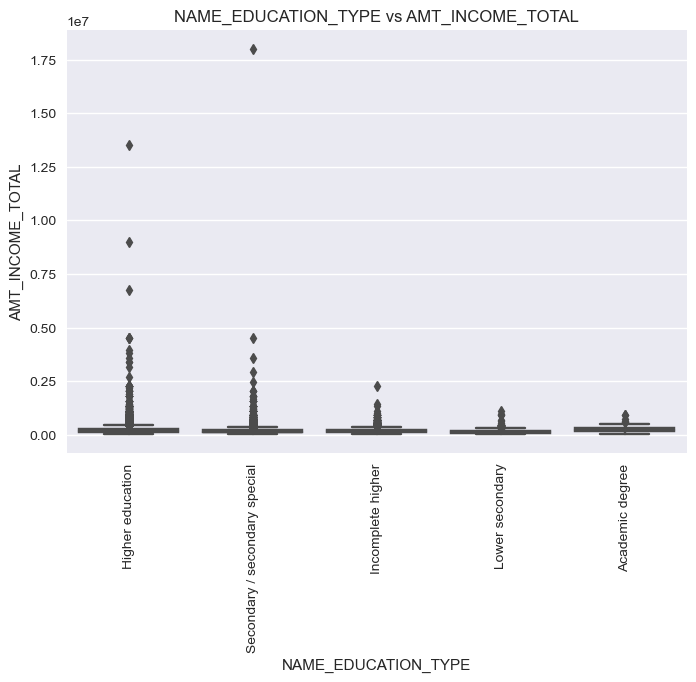

In [64]:
plt.style.use("seaborn")
sns.boxplot(data=df_0, x="NAME_EDUCATION_TYPE", y="AMT_INCOME_TOTAL")
plt.title("NAME_EDUCATION_TYPE vs AMT_INCOME_TOTAL")
plt.xticks(rotation=90)
plt.show()

From above boxplot for Education type 'Higher education' has the highest outliers. Less outlier are having for Academic degree.

### For Target-1

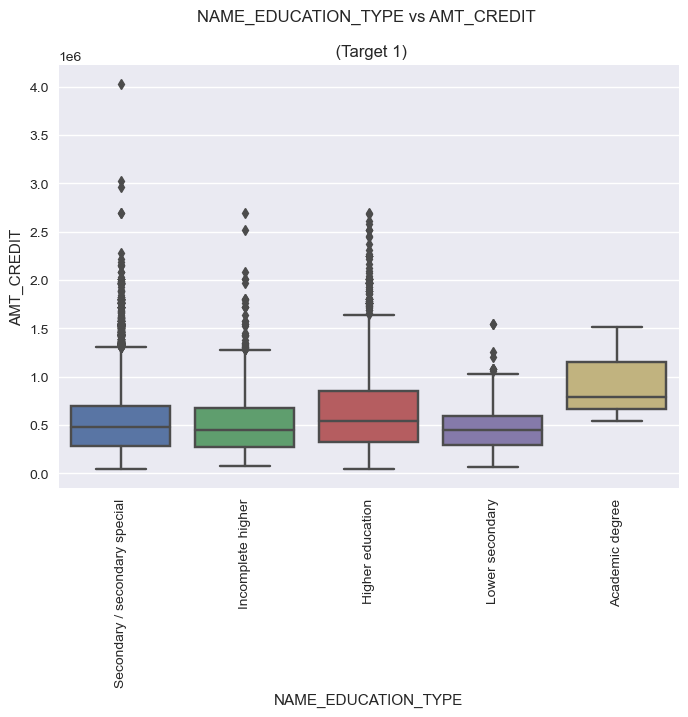

In [65]:
plt.style.use("seaborn")
sns.boxplot(data=df_1, x="NAME_EDUCATION_TYPE", y="AMT_CREDIT")
plt.title("NAME_EDUCATION_TYPE vs AMT_CREDIT \n\n (Target 1)")
plt.xticks(rotation=90)
plt.show()

Quite similar with Target 0 From the above box plot we can say that Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'. Academic degree is having most of the credits in the third quartile.

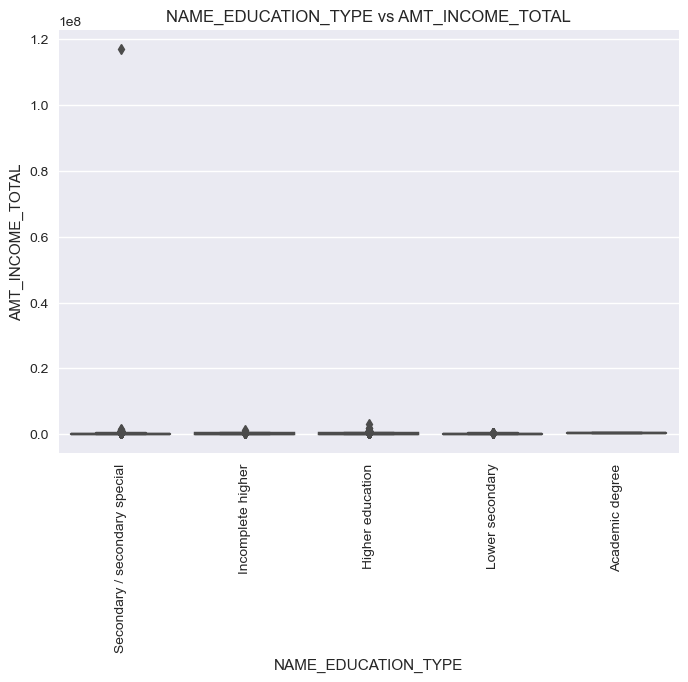

In [66]:
plt.style.use("seaborn")
sns.boxplot(data=df_1, x="NAME_EDUCATION_TYPE", y="AMT_INCOME_TOTAL")
plt.title("NAME_EDUCATION_TYPE vs AMT_INCOME_TOTAL")
plt.xticks(rotation=90)
plt.show()

Have some similarity with Target0, From above boxplot for Education type 'Higher education' has the outliers. No ouliers  can be seen in Academic degree.

In [67]:
# Finding correaltion for numeric values between Target 0 and 1

df_0_corr = df_0.iloc[0:,2:]
df_1_corr = df_1.iloc[0:,2:]

df0 = df_0_corr.corr(method='spearman')
df1 = df_1_corr.corr(method='spearman')

In [68]:
df0

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000         -0.021950   -0.023652   
AMT_INCOME_TOTAL                -0.021950          1.000000    0.403876   
AMT_CREDIT                      -0.023652          0.403876    1.000000   
AMT_ANNUITY                     -0.010795          0.472204    0.826689   
AMT_GOODS_PRICE                 -0.027084          0.408319    0.984499   
REGION_POPULATION_RELATIVE      -0.030579          0.110074    0.060706   
DAYS_BIRTH                       0.266534         -0.054666   -0.169030   
DAYS_EMPLOYED                    0.030948         -0.060868   -0.104251   
DAYS_REGISTRATION                0.155518          0.040559   -0.015318   
DAYS_ID_PUBLISH                 -0.119164         -0.036702   -0.038197   
HOUR_APPR_PROCESS_START         -0.030162          0.073503    0.036923   
REG_REGION_NOT_LIVE_REGION      -0.022813          0.077634    0.015118   
REG_REGION_NOT_WORK_REGION      -0.015475          0.159962    0.041693   
LIVE_REGION_NOT_WORK_REGION     -0.005576          0.148281    0.045175   
REG_CITY_NOT_LIVE_CITY           0.002344         -0.001023   -0.040616   
REG_CITY_NOT_WORK_CITY           0.007487         -0.013856   -0.037000   
LIVE_CITY_NOT_WORK_CITY          0.013295         -0.004758   -0.011194   
EXT_SOURCE_2                    -0.027456          0.184161    0.137629   
OBS_30_CNT_SOCIAL_CIRCLE         0.026816         -0.036970   -0.001623   
DEF_30_CNT_SOCIAL_CIRCLE         0.005460         -0.034036   -0.018819   
OBS_60_CNT_SOCIAL_CIRCLE         0.026536         -0.036669   -0.001530   
DEF_60_CNT_SOCIAL_CIRCLE         0.003688         -0.034723   -0.021286   
AMT_REQ_CREDIT_BUREAU_HOUR       0.000606          0.004924   -0.002374   
AMT_REQ_CREDIT_BUREAU_DAY        0.001692          0.009163    0.001759   
AMT_REQ_CREDIT_BUREAU_WEEK       0.000941          0.014558   -0.002170   
AMT_REQ_CREDIT_BUREAU_MON       -0.008106          0.076992    0.047880   
AMT_REQ_CREDIT_BUREAU_QRT        0.002736          0.039499    0.035164   
AMT_REQ_CREDIT_BUREAU_YEAR      -0.018460          0.080819   -0.006450   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                   -0.010795        -0.027084   
AMT_INCOME_TOTAL                0.472204         0.408319   
AMT_CREDIT                      0.826689         0.984499   
AMT_ANNUITY                     1.000000         0.823739   
AMT_GOODS_PRICE                 0.823739         1.000000   
REGION_POPULATION_RELATIVE      0.064328         0.069873   
DAYS_BIRTH                     -0.100287        -0.169015   
DAYS_EMPLOYED                  -0.074643        -0.109297   
DAYS_REGISTRATION               0.010712        -0.014990   
DAYS_ID_PUBLISH                -0.027354        -0.039771   
HOUR_APPR_PROCESS_START         0.032953         0.044984   
REG_REGION_NOT_LIVE_REGION      0.033435         0.016810   
REG_REGION_NOT_WORK_REGION      0.070841         0.043014   
LIVE_REGION_NOT_WORK_REGION     0.069051         0.045765   
REG_CITY_NOT_LIVE_CITY         -0.019954        -0.041929   
REG_CITY_NOT_WORK_CITY         -0.024085        -0.039550   
LIVE_CITY_NOT_WORK_CITY        -0.008087        -0.013206   
EXT_SOURCE_2                    0.131526         0.146194   
OBS_30_CNT_SOCIAL_CIRCLE       -0.014584        -0.002378   
DEF_30_CNT_SOCIAL_CIRCLE       -0.019623        -0.019912   
OBS_60_CNT_SOCIAL_CIRCLE       -0.014335        -0.002241   
DEF_60_CNT_SOCIAL_CIRCLE       -0.022262        -0.021769   
AMT_REQ_CREDIT_BUREAU_HOUR      0.004442        -0.001558   
AMT_REQ_CREDIT_BUREAU_DAY       0.003250         0.001925   
AMT_REQ_CREDIT_BUREAU_WEEK      0.013836        -0.001203   
AMT_REQ_CREDIT_BUREAU_MON       0.046751         0.049157   
AMT_REQ_CREDIT_BUREAU_QRT       0.029582         0.036345   
AMT_REQ_CREDIT_BUREAU_YEAR      0.014437        -0.007701   

                             REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
CNT_CHILDREN

In [69]:
df1

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000         -0.039123    0.000427   
AMT_INCOME_TOTAL                -0.039123          1.000000    0.364559   
AMT_CREDIT                       0.000427          0.364559    1.000000   
AMT_ANNUITY                      0.015133          0.428947    0.812093   
AMT_GOODS_PRICE                 -0.005792          0.369080    0.975458   
REGION_POPULATION_RELATIVE      -0.029682          0.058005    0.043545   
DAYS_BIRTH                       0.175025         -0.103026   -0.200718   
DAYS_EMPLOYED                    0.006823         -0.053798   -0.107605   
DAYS_REGISTRATION                0.110854          0.011378   -0.021973   
DAYS_ID_PUBLISH                 -0.091042         -0.051113   -0.065143   
HOUR_APPR_PROCESS_START         -0.040338          0.078779    0.024616   
REG_REGION_NOT_LIVE_REGION      -0.035213          0.075615    0.015043   
REG_REGION_NOT_WORK_REGION      -0.040853          0.156374    0.032536   
LIVE_REGION_NOT_WORK_REGION     -0.027993          0.145982    0.034861   
REG_CITY_NOT_LIVE_CITY          -0.016072         -0.003813   -0.030974   
REG_CITY_NOT_WORK_CITY          -0.005444         -0.006241   -0.032882   
LIVE_CITY_NOT_WORK_CITY          0.009557          0.004230   -0.012465   
EXT_SOURCE_2                    -0.014702          0.151537    0.120180   
OBS_30_CNT_SOCIAL_CIRCLE         0.034901         -0.006082    0.016914   
DEF_30_CNT_SOCIAL_CIRCLE        -0.001687         -0.026784   -0.028261   
OBS_60_CNT_SOCIAL_CIRCLE         0.034091         -0.006269    0.016878   
DEF_60_CNT_SOCIAL_CIRCLE        -0.003596         -0.028520   -0.033856   
AMT_REQ_CREDIT_BUREAU_HOUR      -0.000694          0.011622    0.004104   
AMT_REQ_CREDIT_BUREAU_DAY       -0.006995         -0.001456   -0.003968   
AMT_REQ_CREDIT_BUREAU_WEEK       0.001612          0.028747    0.010071   
AMT_REQ_CREDIT_BUREAU_MON       -0.017158          0.089452    0.052620   
AMT_REQ_CREDIT_BUREAU_QRT       -0.008893          0.041152    0.000441   
AMT_REQ_CREDIT_BUREAU_YEAR      -0.012105          0.112054    0.016708   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                    0.015133        -0.005792   
AMT_INCOME_TOTAL                0.428947         0.369080   
AMT_CREDIT                      0.812093         0.975458   
AMT_ANNUITY                     1.000000         0.805644   
AMT_GOODS_PRICE                 0.805644         1.000000   
REGION_POPULATION_RELATIVE      0.028666         0.058364   
DAYS_BIRTH                     -0.100200        -0.198796   
DAYS_EMPLOYED                  -0.060193        -0.116043   
DAYS_REGISTRATION               0.019762        -0.023023   
DAYS_ID_PUBLISH                -0.044128        -0.069184   
HOUR_APPR_PROCESS_START         0.021129         0.037319   
REG_REGION_NOT_LIVE_REGION      0.029646         0.018455   
REG_REGION_NOT_WORK_REGION      0.060363         0.036891   
LIVE_REGION_NOT_WORK_REGION     0.059724         0.038092   
REG_CITY_NOT_LIVE_CITY         -0.011744        -0.031673   
REG_CITY_NOT_WORK_CITY         -0.015938        -0.034329   
LIVE_CITY_NOT_WORK_CITY        -0.003012        -0.012464   
EXT_SOURCE_2                    0.115647         0.132743   
OBS_30_CNT_SOCIAL_CIRCLE        0.004732         0.018845   
DEF_30_CNT_SOCIAL_CIRCLE       -0.022101        -0.025422   
OBS_60_CNT_SOCIAL_CIRCLE        0.005796         0.018808   
DEF_60_CNT_SOCIAL_CIRCLE       -0.026456        -0.030610   
AMT_REQ_CREDIT_BUREAU_HOUR      0.012842         0.006946   
AMT_REQ_CREDIT_BUREAU_DAY      -0.002594        -0.004166   
AMT_REQ_CREDIT_BUREAU_WEEK      0.035096         0.012878   
AMT_REQ_CREDIT_BUREAU_MON       0.061380         0.056629   
AMT_REQ_CREDIT_BUREAU_QRT       0.006869         0.003782   
AMT_REQ_CREDIT_BUREAU_YEAR      0.013577         0.017599   

                             REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
CNT_CHILDREN

### Correlation for Target 0

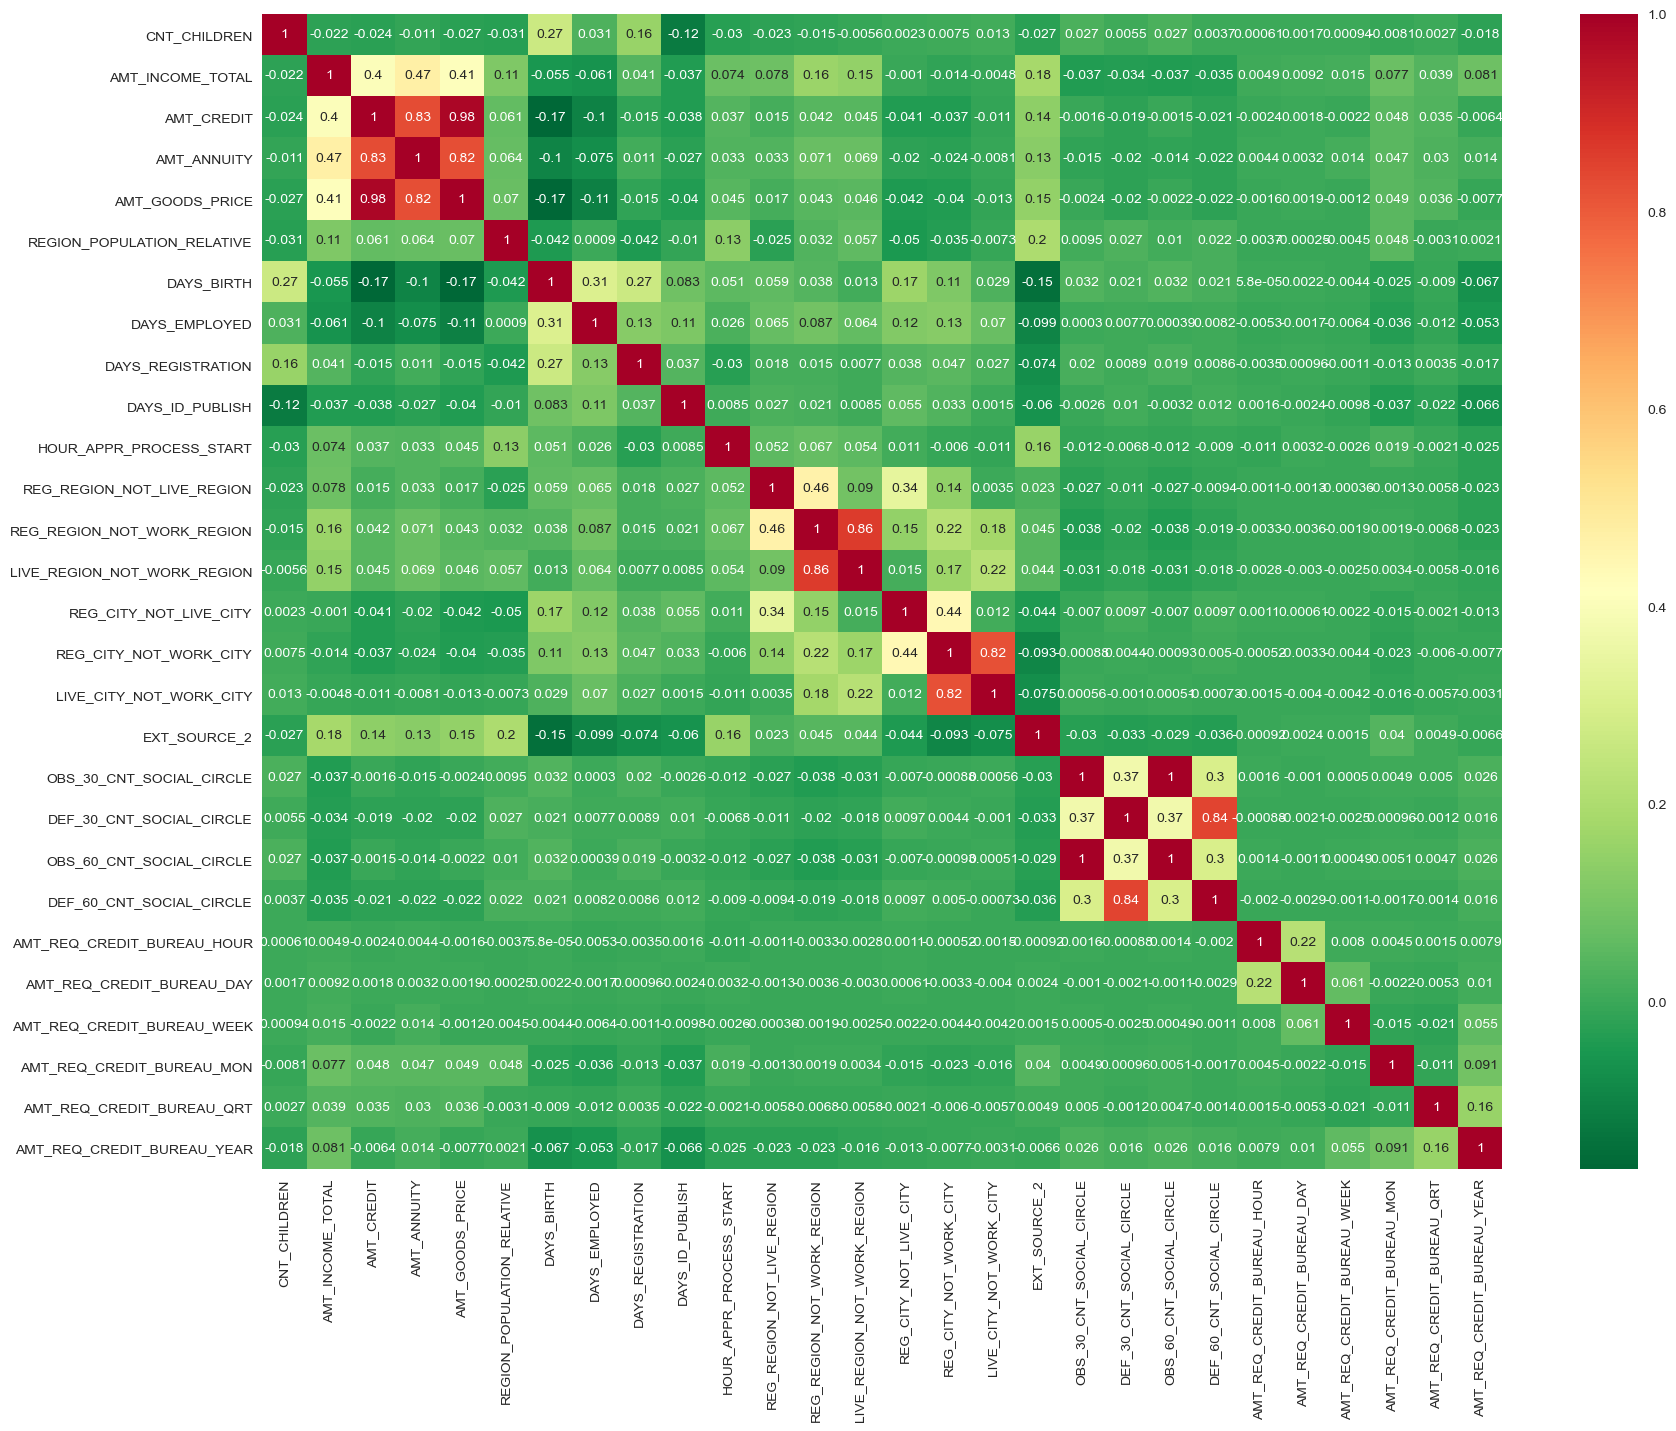

In [70]:
# Analyzing correlation for target 0
plt.figure(figsize=(20,15))
sns.heatmap(data=df0, annot=True, cmap='RdYlGn_r')
plt.show()

In [71]:
# Correlation represents strength of relationship between variables
# Correlation lies in the range of -1 to 1
# Negative correlation  (0 to -1) shows inverse relationship
# Positive correlation (0 to 1) shows direct relationship
# 0 correlation represents no relationship.

From the above heatmap we can conclude that AMT_CREDIT and DAYS_BIRTH do not have a correlation as the credit is higher for the low age applicantes and vise-versa. Similarlt, AMT_GOODS_PRICE and DAYS_BIRTH also does not have correlation as the consumer goods are higher for children and vise-versa.

### Correlation for Target 1

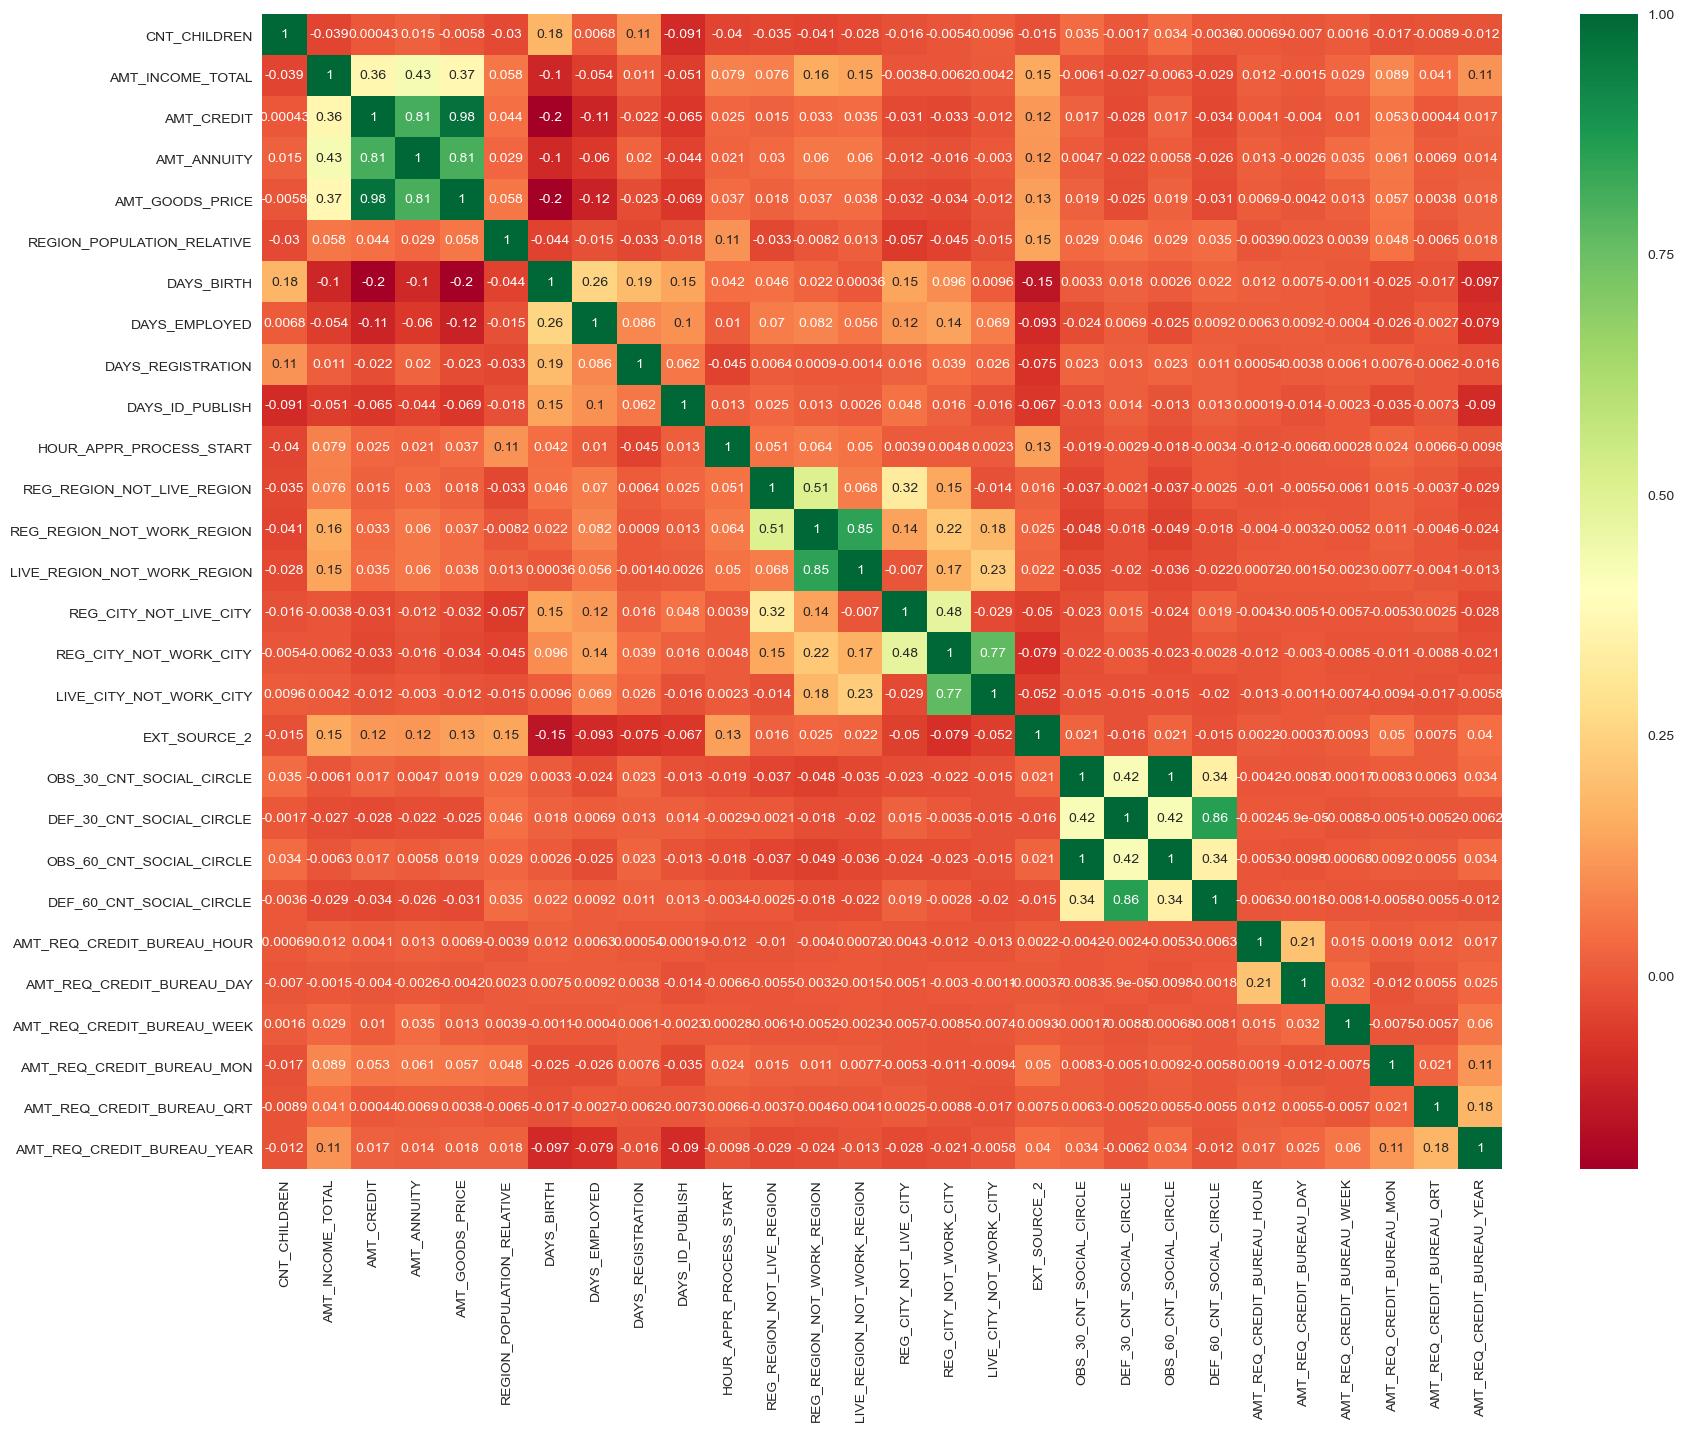

In [72]:
# Analyzing correlation for target 1
plt.figure(figsize=(20,15))
sns.heatmap(data=df1, cmap='RdYlGn',annot=True)
plt.show()

For Target 1 there are quit same observation as Target 0.

## Loading previous.csv file

In [73]:
df2 = pd.read_csv("C:/Users/Arbaaz/Downloads/IIIT-Data Science program/EDA_Assignment_Solution/previous_application.csv")

In [74]:
df2.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [75]:
df2.shape

(1670214, 37)

In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [77]:
df2.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

### Missing value check

In [78]:
100*df2.isnull().mean()

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [79]:
temp=(100*df2.isnull().sum()/df2.shape[0]).reset_index().rename(columns={"index":"column_name",0:"% missing"})
drop_cols = list(temp[temp["% missing"]>=40]["column_name"])

In [80]:
# Let's drop the columns values greater than 40%

df2 = df2.drop(drop_cols, axis=1)

In [81]:
# Again Checking the missing values
100*df2.isnull().mean()

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

### Handeling Missing Values

In [82]:
# Checking missing values for AMT_ANNUITY
df2.AMT_ANNUITY.isnull().sum()

372235

In [83]:
# Applying median as AMT_ANNUITY is a numerical column
med=df2["AMT_ANNUITY"].median()
df2["AMT_ANNUITY"]=df2["AMT_ANNUITY"].fillna(med)    

In [84]:
# Again checking null values in AMT_ANNUITY
df2.AMT_ANNUITY.isnull().sum()

0

In [85]:
# Checking missing values for AMT_GOODS_PRICE
df2.AMT_GOODS_PRICE.isnull().sum()

385515

In [86]:
# Applying median as AMT_GOODS_PRICE is a numerical column
med=df2["AMT_GOODS_PRICE"].median()
df2["AMT_GOODS_PRICE"]=df2["AMT_GOODS_PRICE"].fillna(med) 

In [87]:
# Again checking null values in AMT_GOODS_PRICE
df2.AMT_GOODS_PRICE.isnull().sum()

0

In [88]:
# Checking missing values for CNT_PAYMENT
df2.CNT_PAYMENT.isnull().sum()

372230

In [89]:
# Applying median as CNT_PAYMENT is a numerical column
med=df2["CNT_PAYMENT"].median()
df2["CNT_PAYMENT"]=df2["CNT_PAYMENT"].fillna(med)

In [90]:
# Again checking null values in CNT_PAYMENT
df2.CNT_PAYMENT.isnull().sum()

0

In [91]:
# Checking missing values for CNT_PAYMENT
df2.CNT_PAYMENT.isnull().sum()

0

In [92]:
# Checking missing values for PRODUCT_COMBINATION
df2.PRODUCT_COMBINATION.isnull().sum()

346

In [93]:
df2.PRODUCT_COMBINATION.value_counts(normalize=True)

Cash                              0.171265
POS household with interest       0.157870
POS mobile with interest          0.132148
Cash X-Sell: middle               0.086164
Cash X-Sell: low                  0.077999
Card Street                       0.067420
POS industry with interest        0.059186
POS household without interest    0.049649
Card X-Sell                       0.048257
Cash Street: high                 0.035715
Cash X-Sell: high                 0.035512
Cash Street: middle               0.020755
Cash Street: low                  0.020261
POS mobile without interest       0.014421
POS other with interest           0.014300
POS industry without interest     0.007547
POS others without interest       0.001530
Name: PRODUCT_COMBINATION, dtype: float64

In [94]:
#find the mode of month in inp1
mod=df2.PRODUCT_COMBINATION.mode()[0]
mod

'Cash'

In [95]:
# fill the missing values with mode value of PRODUCT_COMBINATION in df2.
df2.PRODUCT_COMBINATION.fillna(mod, inplace= True)
df2.PRODUCT_COMBINATION.value_counts(normalize= True)

Cash                              0.171437
POS household with interest       0.157837
POS mobile with interest          0.132121
Cash X-Sell: middle               0.086146
Cash X-Sell: low                  0.077983
Card Street                       0.067406
POS industry with interest        0.059174
POS household without interest    0.049639
Card X-Sell                       0.048247
Cash Street: high                 0.035707
Cash X-Sell: high                 0.035505
Cash Street: middle               0.020751
Cash Street: low                  0.020257
POS mobile without interest       0.014419
POS other with interest           0.014297
POS industry without interest     0.007545
POS others without interest       0.001530
Name: PRODUCT_COMBINATION, dtype: float64

In [96]:
# Again checking missing values in PRODUCT_COMBINATION
df2.PRODUCT_COMBINATION.isnull().sum()

0

In [97]:
# Again checking missing value percentage for df2
100*df2.isnull().mean()

SK_ID_PREV                     0.00000
SK_ID_CURR                     0.00000
NAME_CONTRACT_TYPE             0.00000
AMT_ANNUITY                    0.00000
AMT_APPLICATION                0.00000
AMT_CREDIT                     0.00006
AMT_GOODS_PRICE                0.00000
WEEKDAY_APPR_PROCESS_START     0.00000
HOUR_APPR_PROCESS_START        0.00000
FLAG_LAST_APPL_PER_CONTRACT    0.00000
NFLAG_LAST_APPL_IN_DAY         0.00000
NAME_CASH_LOAN_PURPOSE         0.00000
NAME_CONTRACT_STATUS           0.00000
DAYS_DECISION                  0.00000
NAME_PAYMENT_TYPE              0.00000
CODE_REJECT_REASON             0.00000
NAME_CLIENT_TYPE               0.00000
NAME_GOODS_CATEGORY            0.00000
NAME_PORTFOLIO                 0.00000
NAME_PRODUCT_TYPE              0.00000
CHANNEL_TYPE                   0.00000
SELLERPLACE_AREA               0.00000
NAME_SELLER_INDUSTRY           0.00000
CNT_PAYMENT                    0.00000
NAME_YIELD_GROUP               0.00000
PRODUCT_COMBINATION      

As we can see that all the missing values has been handled and the columns which had 40% of missing values were dropped.

In [98]:
df2.shape

(1670214, 26)

In [99]:
# Deleting the columns which are not useflu for the analysis
df2 = df2.drop(["WEEKDAY_APPR_PROCESS_START","NAME_PRODUCT_TYPE","NAME_CASH_LOAN_PURPOSE","NAME_GOODS_CATEGORY","NAME_PAYMENT_TYPE"
               ,"CODE_REJECT_REASON"], axis=1)


In [100]:
df2.shape

(1670214, 20)

In [101]:
# Deleting numerical var columns which are not needed for the analysis
df2 = df2.drop(["HOUR_APPR_PROCESS_START","NFLAG_LAST_APPL_IN_DAY","DAYS_DECISION","SELLERPLACE_AREA"], axis=1)

In [102]:
df2.shape

(1670214, 16)

In [103]:
# Values counts for object columns
for i in df2.columns:
    if df2[i].dtypes=="object":
        print(df2[i].value_counts(normalize=True))
        print("\n")

Cash loans         0.447579
Consumer loans     0.436561
Revolving loans    0.115652
XNA                0.000207
Name: NAME_CONTRACT_TYPE, dtype: float64


Y    0.994926
N    0.005074
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64


Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: NAME_CONTRACT_STATUS, dtype: float64


Repeater     0.737188
New          0.180434
Refreshed    0.081217
XNA          0.001162
Name: NAME_CLIENT_TYPE, dtype: float64


POS      0.413726
Cash     0.276350
XNA      0.222864
Cards    0.086806
Cars     0.000254
Name: NAME_PORTFOLIO, dtype: float64


Credit and cash offices       0.431063
Country-wide                  0.296184
Stone                         0.126980
Regional / Local              0.064978
Contact center                0.042687
AP+ (Cash loan)               0.034155
Channel of corporate sales    0.003682
Car dealer                    0.000271
Name: CHANNEL_TYPE, dtype: float64


XNA          

In [104]:
# Values counts for numerical columns
for i in df2.columns:
    if df2[i].dtypes=="float64":
        print(df2[i].value_counts(normalize=True))
        print("\n")

11250.000    2.312332e-01
2250.000     1.907839e-02
6750.000     8.048070e-03
9000.000     7.481676e-03
22500.000    7.126632e-03
                 ...     
3794.445     5.987257e-07
8723.160     5.987257e-07
27948.330    5.987257e-07
25374.285    5.987257e-07
14704.290    5.987257e-07
Name: AMT_ANNUITY, Length: 357959, dtype: float64


0.00         2.349412e-01
45000.00     2.863765e-02
225000.00    2.607031e-02
135000.00    2.435496e-02
450000.00    2.329342e-02
                 ...     
185292.00    5.987257e-07
225054.00    5.987257e-07
156212.55    5.987257e-07
99896.31     5.987257e-07
267295.50    5.987257e-07
Name: AMT_APPLICATION, Length: 93885, dtype: float64


0.00         2.016318e-01
45000.00     2.098595e-02
225000.00    1.262953e-02
450000.00    1.194698e-02
135000.00    1.120815e-02
                 ...     
262768.50    5.987260e-07
354213.00    5.987260e-07
438817.50    5.987260e-07
253111.50    5.987260e-07
436370.22    5.987260e-07
Name: AMT_CREDIT, Length: 86803, dt

In [105]:
num_cols = ["AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"]
cat_cols = ["NAME_CONTRACT_TYPE","NAME_CLIENT_TYPE","NAME_PORTFOLIO"]

## Univeraite Analysis

### Numerical

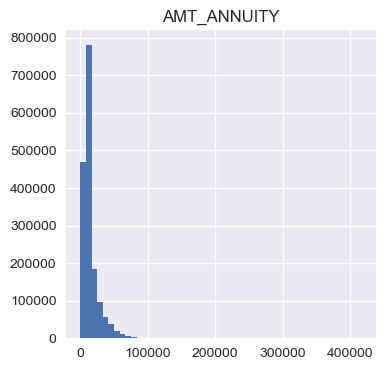

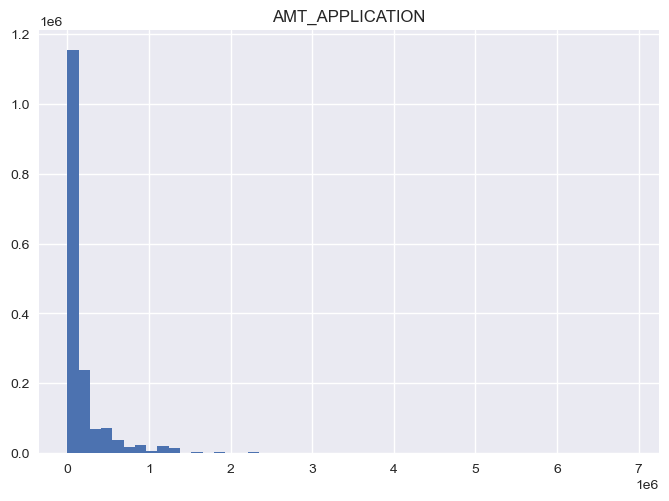

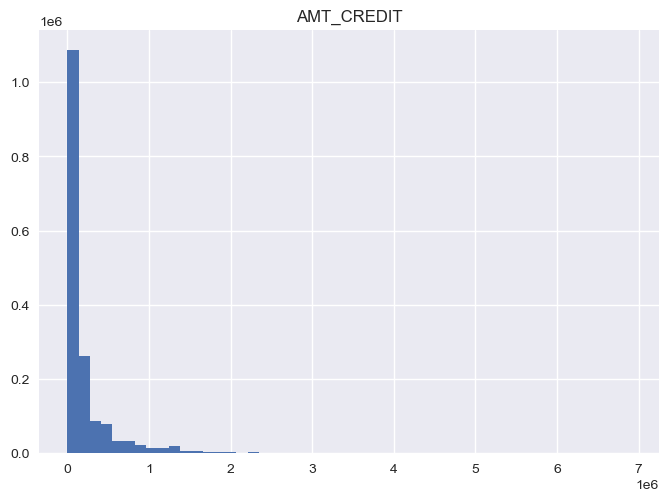

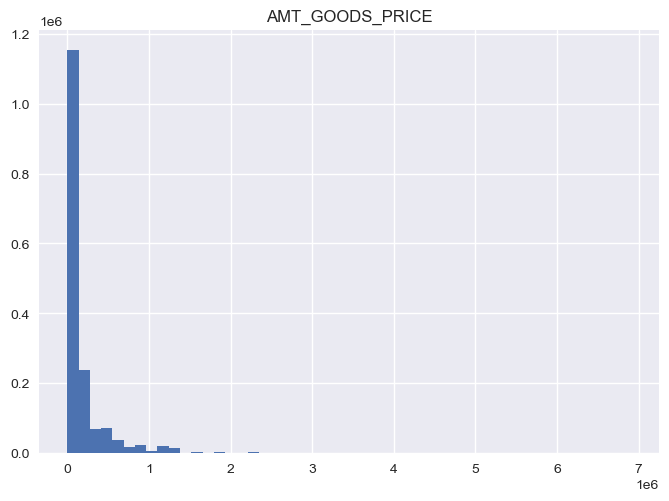

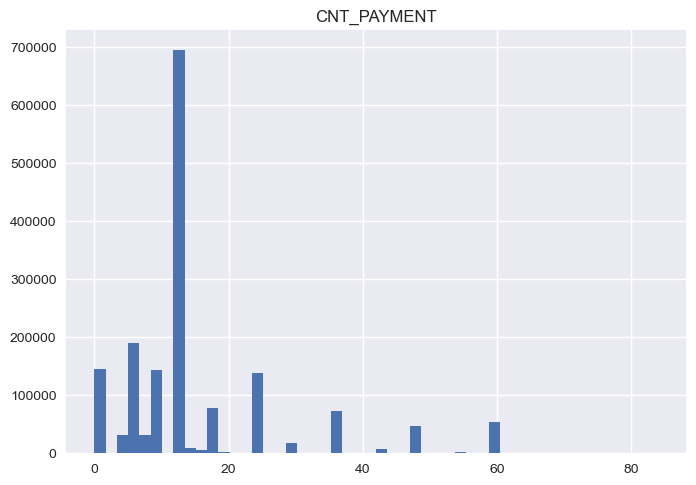

In [106]:
plt.figure(figsize=[4,4])
for i in num_cols:
    plt.hist(x=df2[i], bins = 50)
    plt.title(i)
    plt.show()

From the above histogram we can conclude that AMT_APPLICATION, AMT_CREDIT and AMT_GOODS_PRICE has the highest values at there initial stage which is 0. In addition, for AMT_ANNUITY column the larger value is between 0 to 50000 and for CNT_PAYMENT is at 15.

### Outlier Check

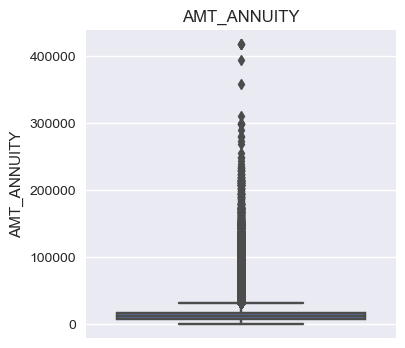

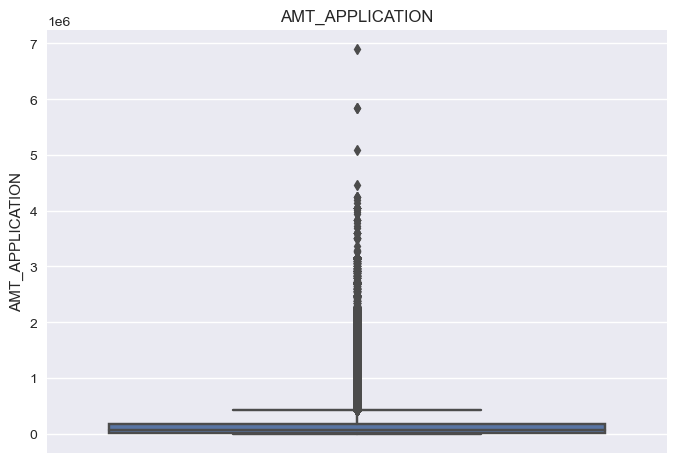

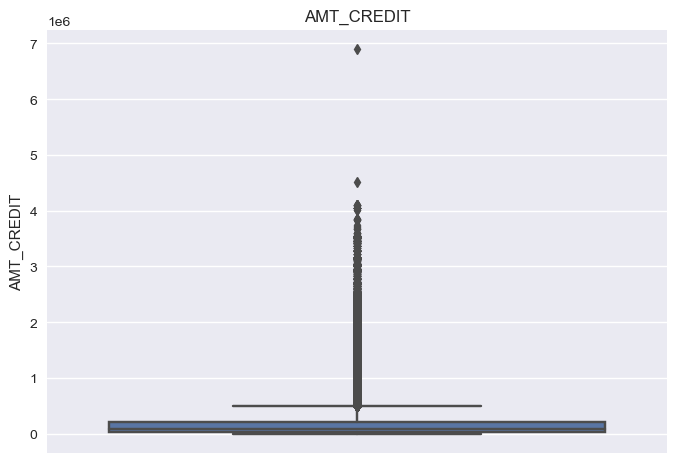

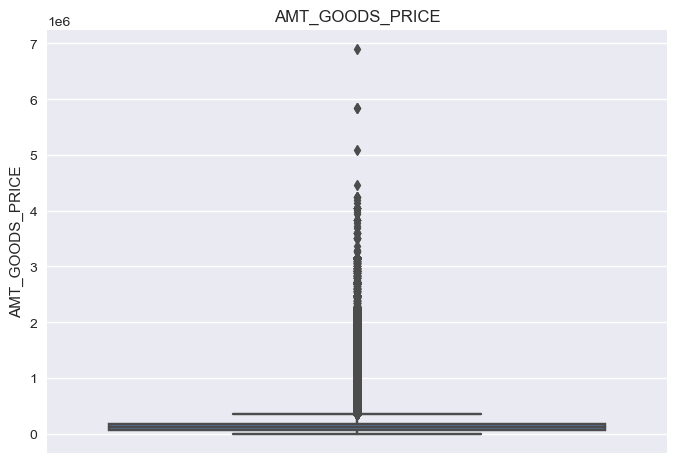

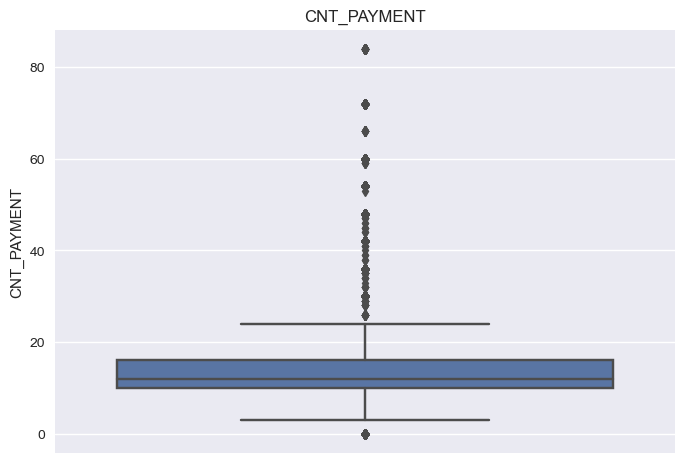

In [107]:
plt.figure(figsize=[4,4])
for i in num_cols:
    sns.boxplot(y=df2[i])
    plt.title(i)
    plt.show()

From the above boxplot the AMT_GOODS_PRICE has the highest outliers followed by CNT_PAYMENT. However, AMT_CREDIT has only one outlier seperated from the continuous values. Moreover, for CNT_PAYMENT the 75th percentile is larger than 25th.

### Catergorical

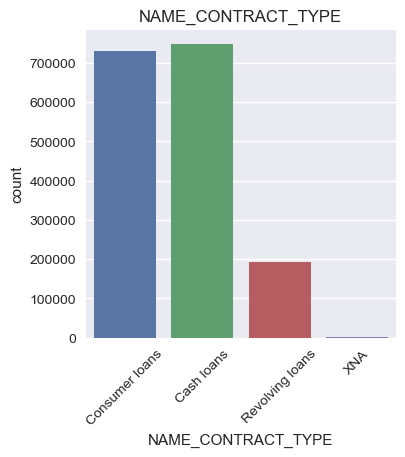

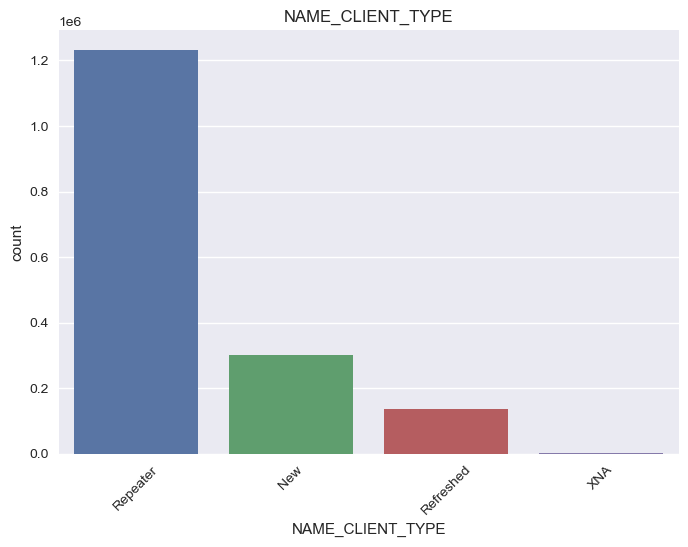

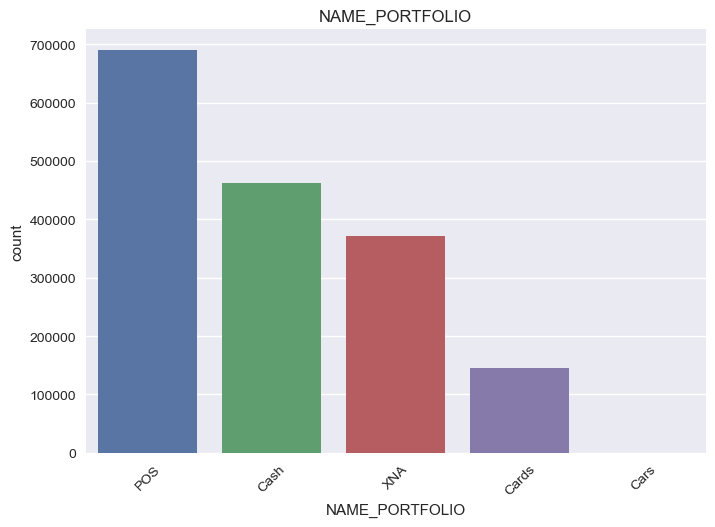

In [108]:
plt.figure(figsize=[4,4])
for i in cat_cols:
    sns.countplot(x=df2[i])
    plt.xticks(rotation=45)
    plt.title(i)
    plt.show()

In the above analysis we can see that NAME_CONTRACT_TYPE cash loans has the highest value followed by consumer loans. Moreover, NAME_CLIENT_TYPE the repeater has the highest value means the same people had taken loan for multiple times and for NAME_PORTFOLIO the POS has the larger value.

## Bivariate Analysis

### Numerical vs Numerical

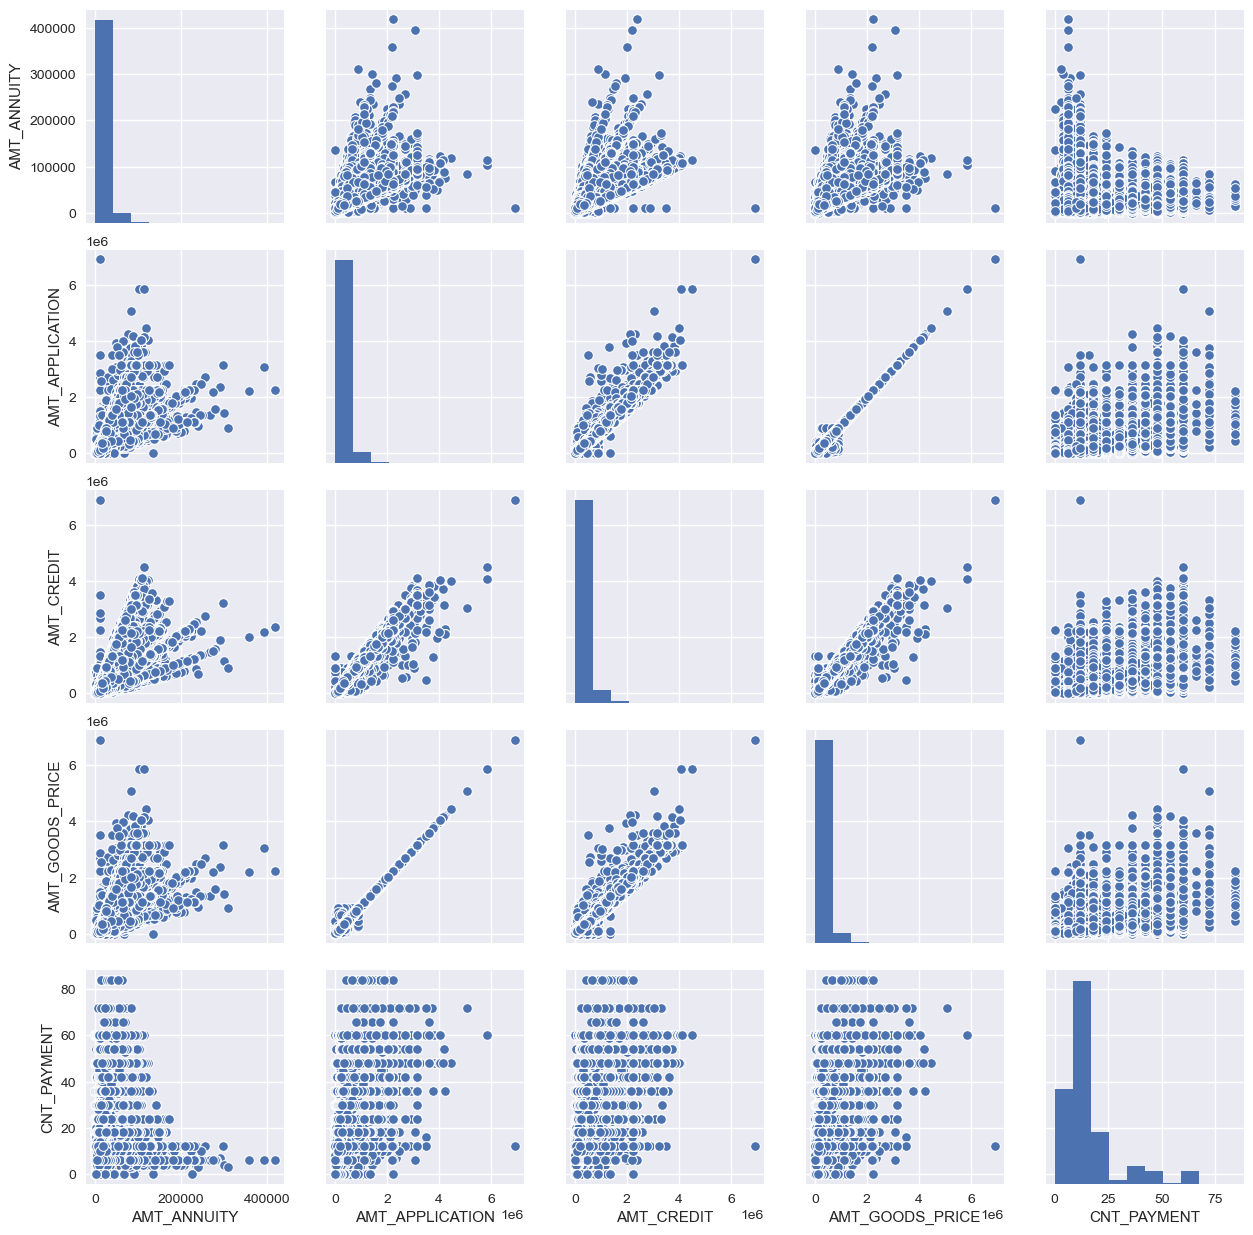

In [109]:
sns.pairplot(df2[["AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"]])
plt.show()

From the above analysis we conclude that AMT_ANUITY, AMT_APPLICATION and AMT_GOODS_PRICE have higher correlation. Similarly, for AMT_CREDIT to AMT_GOODS_PRICE also shows high correaltion. For CNT_PAYMENT and AMT_CREDIT does not show that much of high correaltion because as the credit increases the loan term is high.

### Categorical vs Numerical

Boxplot of NAME_CONTRACT_TYPE Vs AMT_ANNUITY


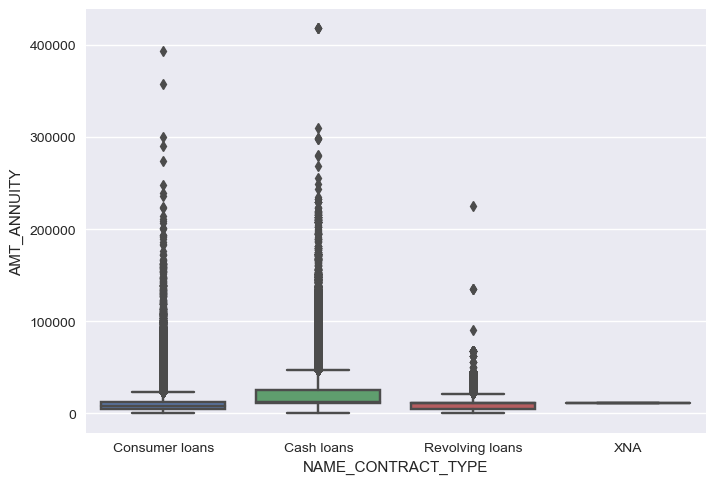

Boxplot of NAME_CONTRACT_TYPE Vs AMT_APPLICATION


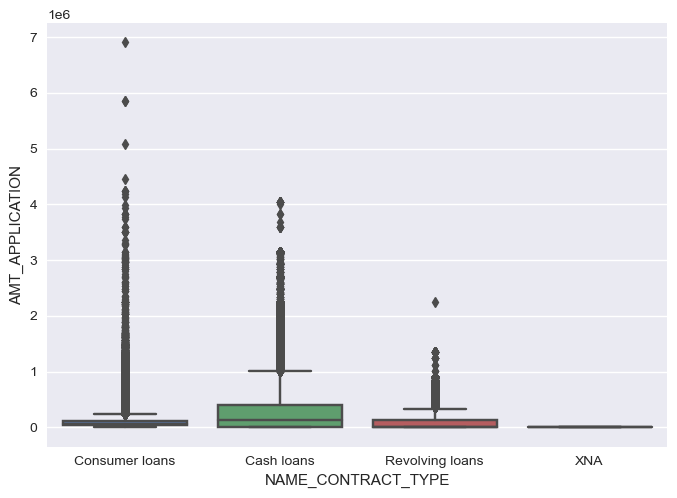

Boxplot of NAME_CONTRACT_TYPE Vs AMT_CREDIT


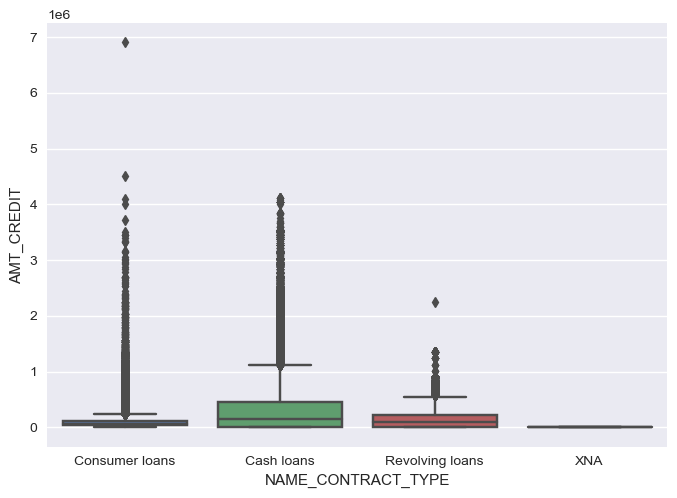

Boxplot of NAME_CONTRACT_TYPE Vs AMT_GOODS_PRICE


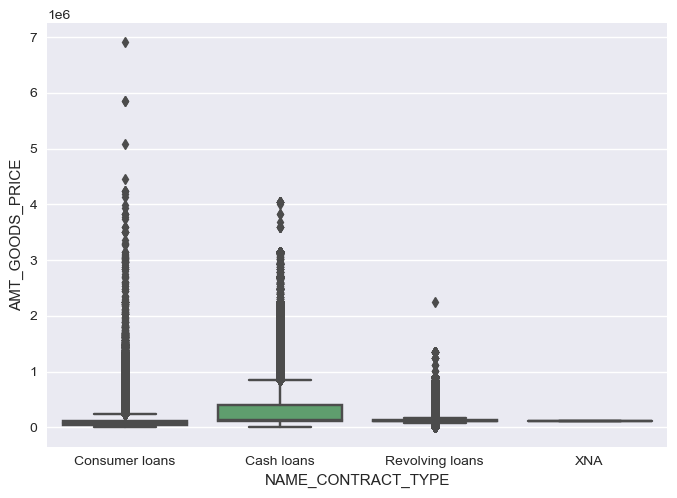

Boxplot of NAME_CONTRACT_TYPE Vs CNT_PAYMENT


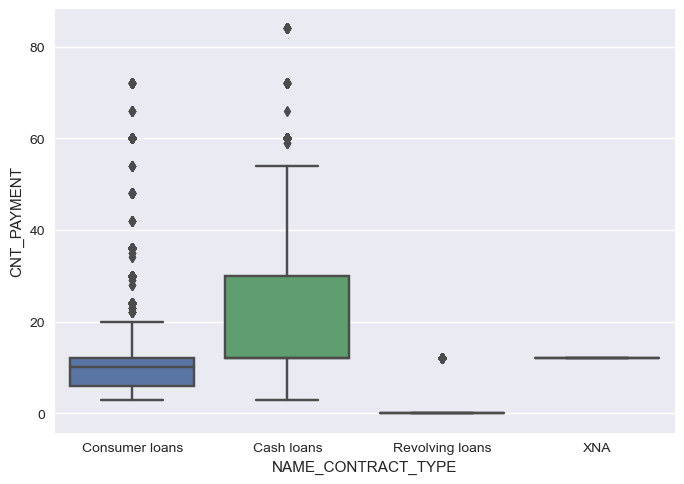

Boxplot of NAME_CLIENT_TYPE Vs AMT_ANNUITY


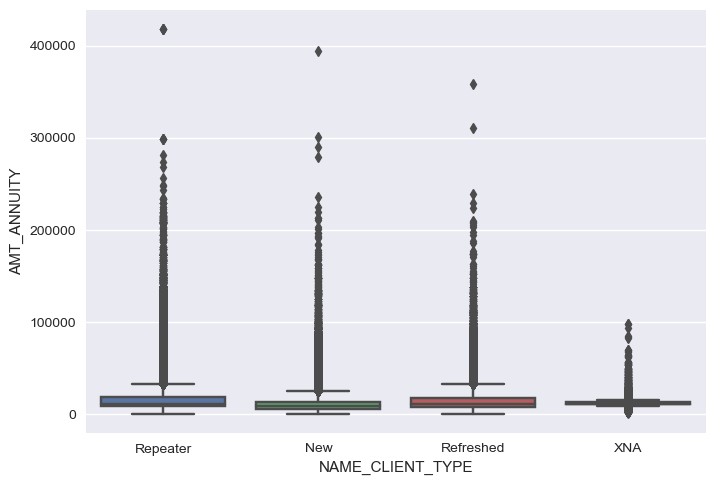

Boxplot of NAME_CLIENT_TYPE Vs AMT_APPLICATION


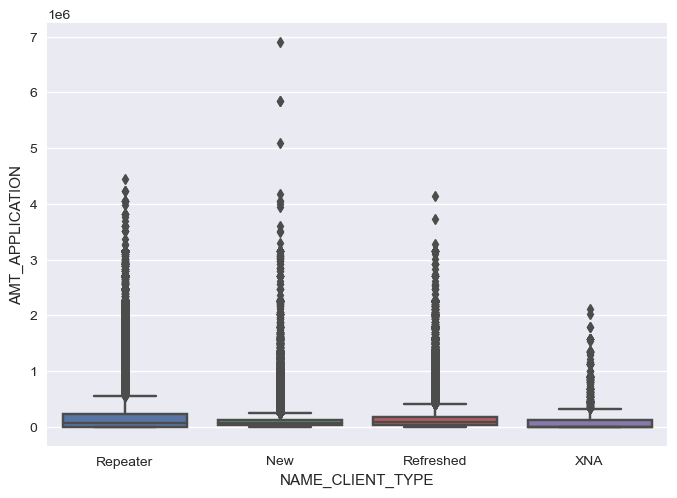

Boxplot of NAME_CLIENT_TYPE Vs AMT_CREDIT


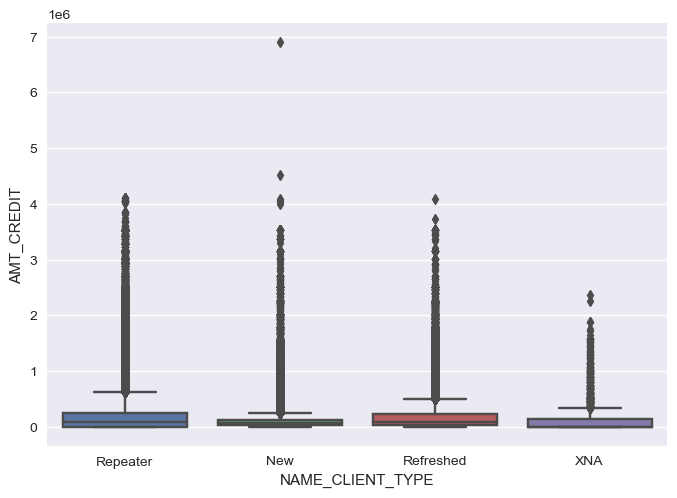

Boxplot of NAME_CLIENT_TYPE Vs AMT_GOODS_PRICE


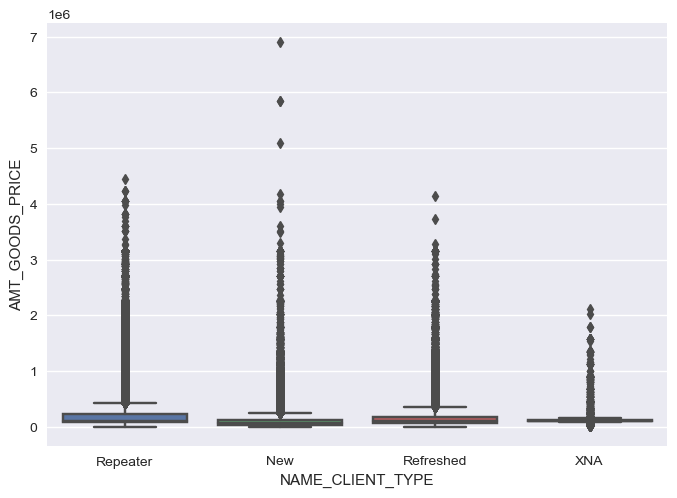

Boxplot of NAME_CLIENT_TYPE Vs CNT_PAYMENT


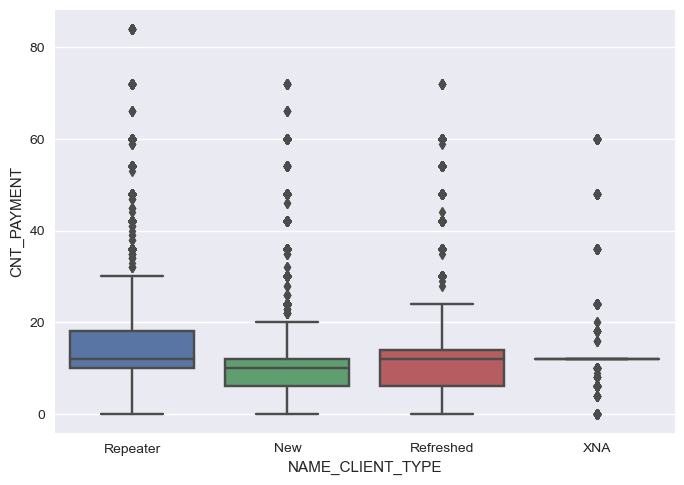

Boxplot of NAME_PORTFOLIO Vs AMT_ANNUITY


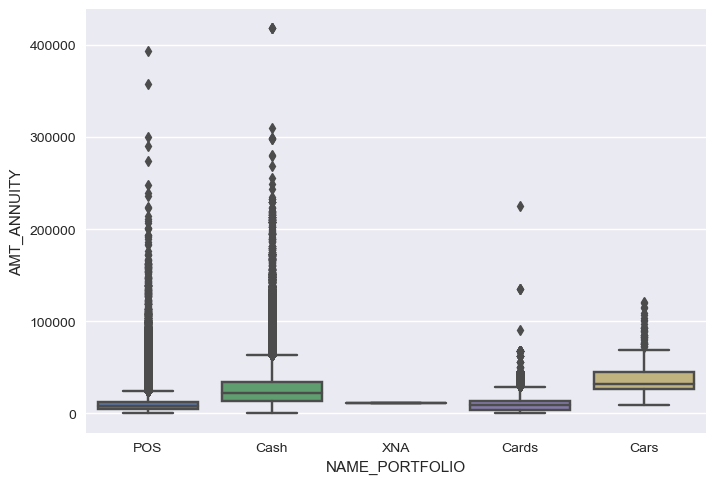

Boxplot of NAME_PORTFOLIO Vs AMT_APPLICATION


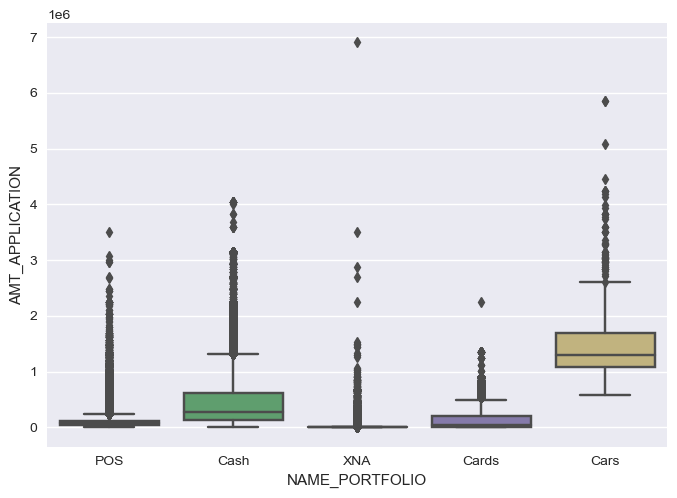

Boxplot of NAME_PORTFOLIO Vs AMT_CREDIT


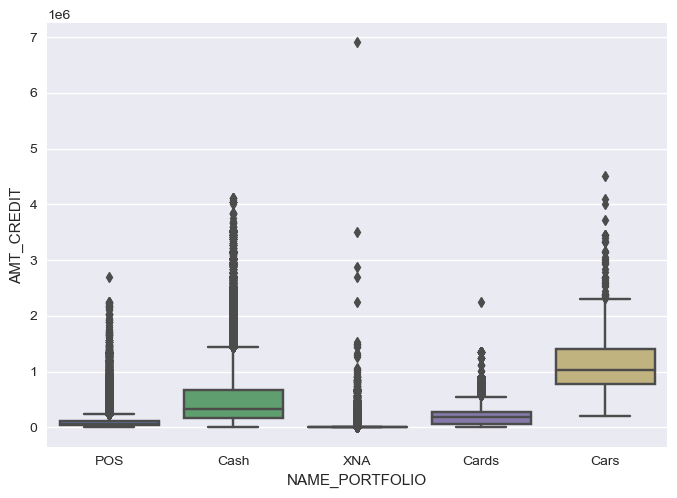

Boxplot of NAME_PORTFOLIO Vs AMT_GOODS_PRICE


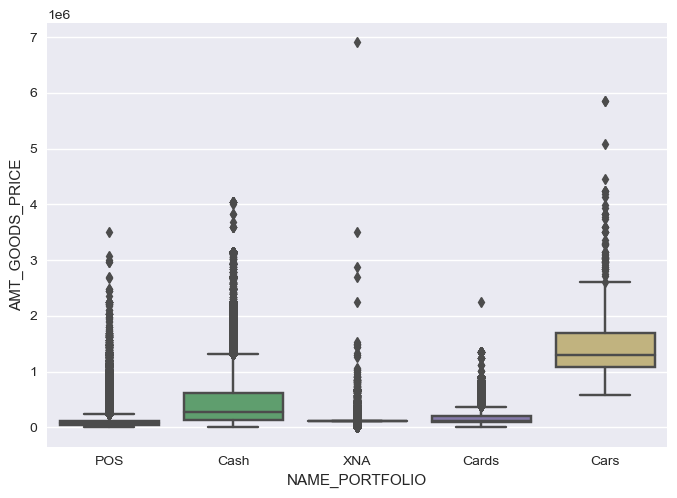

Boxplot of NAME_PORTFOLIO Vs CNT_PAYMENT


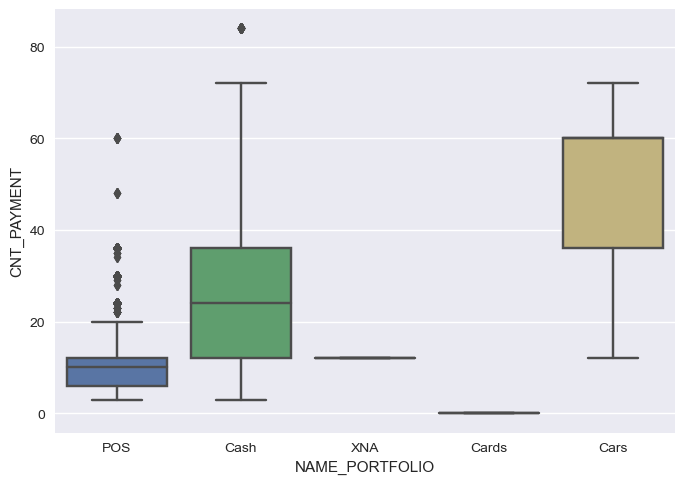

In [110]:
for col1 in cat_cols:
    for col2 in num_cols:
        print("Boxplot of",col1,"Vs",col2)
        sns.boxplot(x=df2[col1],y=df2[col2])
        plt.show()

## Multivariate Analysis

#### NAME_CONTRACT_STATUS vs NAME_CLIENT_TYPE vs AMT_GOODS_PRICE

In [111]:
res=pd.pivot_table(data=df2, index="NAME_CONTRACT_STATUS", columns="NAME_CLIENT_TYPE", values="AMT_GOODS_PRICE",aggfunc=np.mean)
res

NAME_CLIENT_TYPE                New      Refreshed       Repeater  \
NAME_CONTRACT_STATUS                                                
Approved              104544.593435  186757.549299  219452.377251   
Canceled              134951.110062  139570.369150  130647.401077   
Refused               167715.085740  324723.649164  357257.687767   
Unused offer           79955.690294   68183.136360   69044.279675   

NAME_CLIENT_TYPE                XNA  
NAME_CONTRACT_STATUS                 
Approved              200635.827976  
Canceled              126008.114754  
Refused               407155.218814  
Unused offer           60532.500000

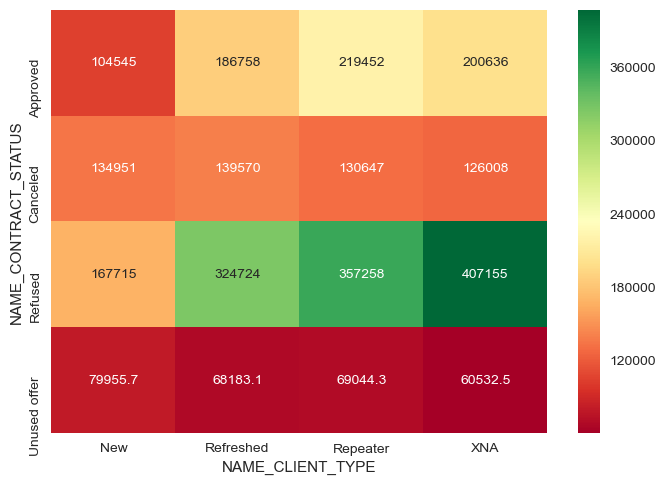

In [112]:
# Plotting heatmap for above analysis
sns.heatmap(res, annot=True, cmap="RdYlGn", fmt="g")
plt.show()

#### NAME_CONTRACT_STATUS vs NAME_CLIENT_TYPE vs AMT_APPLICATION

In [113]:
res=pd.pivot_table(data=df2, index="NAME_CONTRACT_STATUS", columns="NAME_CLIENT_TYPE", values="AMT_APPLICATION",)
res

NAME_CLIENT_TYPE                New      Refreshed       Repeater  \
NAME_CONTRACT_STATUS                                                
Approved              104501.463936  182651.102337  212763.313218   
Canceled               29785.653467   32882.732284   21987.202331   
Refused               166430.850414  312662.667324  341926.056317   
Unused offer           79955.690294   68183.136360   69016.648678   

NAME_CLIENT_TYPE                XNA  
NAME_CONTRACT_STATUS                 
Approved              200635.827976  
Canceled               15989.754098  
Refused               391608.100169  
Unused offer           60532.500000

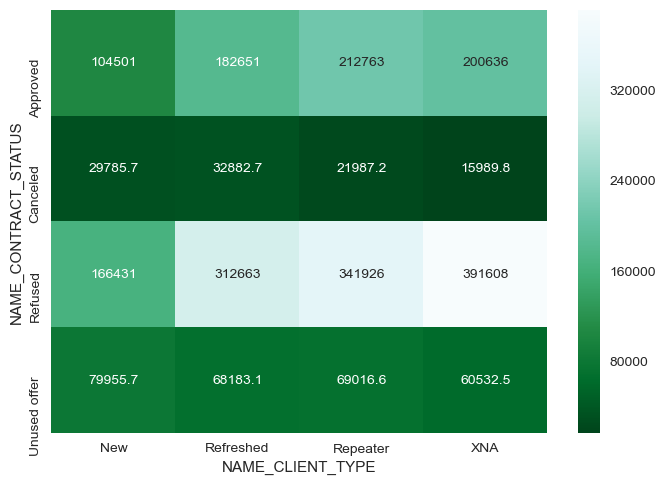

In [114]:
# Plotting heatmap for above analysis
sns.heatmap(res, annot=True, cmap="BuGn_r", fmt="g")
plt.show()

#### NAME_CONTRACT_STATUS vs NAME_CLIENT_TYPE vs AMT_CREDIT

In [115]:
res=pd.pivot_table(data=df2, index="NAME_CONTRACT_STATUS", columns="NAME_CLIENT_TYPE", values="AMT_CREDIT")
res

NAME_CLIENT_TYPE                New      Refreshed       Repeater  \
NAME_CONTRACT_STATUS                                                
Approved              104025.960982  204809.831935  244352.146661   
Canceled               29739.009724   34923.959025   23424.759022   
Refused               172769.754362  351742.642226  383769.315980   
Unused offer           79955.690294   68186.019866   69046.338494   

NAME_CLIENT_TYPE                XNA  
NAME_CONTRACT_STATUS                 
Approved              214309.849593  
Canceled               17039.065574  
Refused               426577.498475  
Unused offer           60532.500000

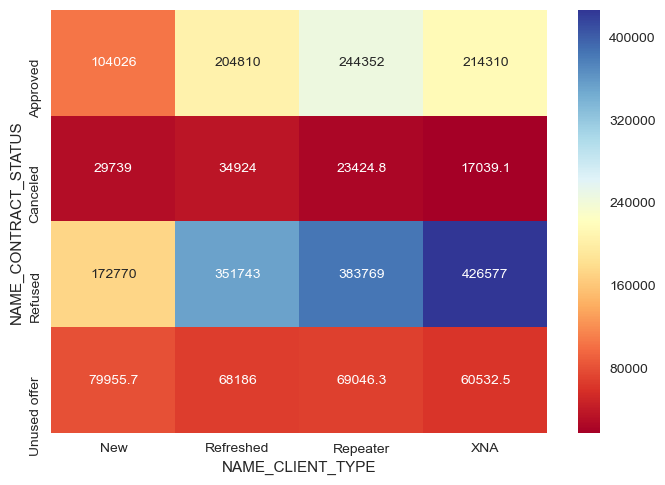

In [116]:
# Plotting heatmap for above analysis
sns.heatmap(res, annot=True, cmap="RdYlBu", fmt="g")
plt.show()

As we can see from the all the above heatmaps all XNA and refused has the highest values.

## Merging the datasets

In [117]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0            -2120        Laborers                  WEDNESDAY   
1             -291      Core staff                     MONDAY   
2            -2531        Laborers                     MONDAY   
3            -2437        Laborers                  WEDNESDAY   
4            -3458      Core staff                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3      0.262949                       2.0   
1                  School      0.622246                       1.0   
2              Government      0.555912                      

In [118]:
df2.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE FLAG_LAST_APPL_PER_CONTRACT  \
0     17145.0          17145.0                           Y   
1    679671.0         607500.0                           Y   
2    136444.5         112500.0                           Y   
3    470790.0         450000.0                           Y   
4    404055.0         337500.0                           Y   

  NAME_CONTRACT_STATUS NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0             Approved         Repeater            POS   
1             Approved         Repeater           Cash   
2             Approved         Repeater           Cash   
3             Approved         Repeater           Cash   
4              Refused         Repeater           Cash   

              CHANNEL_TYPE NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
0             Country-wide         Connectivity         12.0           middle   
1           Contact center                  XNA         36.0       low_action   
2  Credit and cash offices                  XNA         12.0             high   
3  Credit and cash offices                  XNA         12.0           middle   
4  Credit and cash offices                  XNA         24.0             high   

        PRODUCT_COMBINATION  
0  POS mobile with interest  
1          Cash X-Sell: low  
2         Cash X-Sell: high  
3       Cash X-Sell: middle  
4         Cash Street: high

In [119]:
df3 = pd.merge(df, df2, on="SK_ID_CURR", how="left")
df3.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.003541      -16765          -1188            -1186.0   
3                    0.003541      -16765          -1188            -1186.0   
4                    0.010032      -19046           -225            -4260.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0            -2120        Laborers                  WEDNESDAY   
1             -291      Core staff                     MONDAY   
2             -291      Core staff                     MONDAY   
3             -291      Core staff                     MONDAY   
4            -2531        Laborers                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                       11                           0   
3                       11                           0   
4                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       0                        0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3      0.262949                       2.0   
1                  School      0.622246                       1.0   
2            

### Analysis on merged dataframes

In [120]:
df3[(df3['NAME_CONTRACT_STATUS']=="Approved") &  df3["TARGET"]==0]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
1            100003       0           Cash loans           F            N   
2            100003       0           Cash loans           F            N   
3            100003       0           Cash loans           F            N   
4            100004       0      Revolving loans           M            Y   
5            100006       0           Cash loans           F            N   
...             ...     ...                  ...         ...          ...   
1153782      456255       0           Cash loans           F            N   
1153783      456255       0           Cash loans           F            N   
1153784      456255       0           Cash loans           F            N   
1153785      456255       0           Cash loans           F            N   
1153786      456255       0           Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
1                     N             0          270000.0     1293502.5   
2                     N             0          270000.0     1293502.5   
3                     N             0          270000.0     1293502.5   
4                     Y             0           67500.0      135000.0   
5                     Y             0          135000.0      312682.5   
...                 ...           ...               ...           ...   
1153782               N             0          157500.0      675000.0   
1153783               N             0          157500.0      675000.0   
1153784               N             0          157500.0      675000.0   
1153785               N             0          157500.0      675000.0   
1153786               N             0          157500.0      675000.0   

         AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE  \
1              35698.5          1129500.0          Family   
2              35698.5          1129500.0          Family   
3              35698.5          1129500.0          Family   
4               6750.0           135000.0   Unaccompanied   
5              29686.5           297000.0   Unaccompanied   
...                ...                ...             ...   
1153782        49117.5           675000.0   Unaccompanied   
1153783        49117.5           675000.0   Unaccompanied   
1153784        49117.5           675000.0   Unaccompanied   
1153785        49117.5           675000.0   Unaccompanied   
1153786        49117.5           675000.0   Unaccompanied   

             NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
1               State servant               Higher education   
2               State servant               Higher education   
3               State servant               Higher education   
4                     Working  Secondary / secondary special   
5                     Working  Secondary / secondary special   
...                       ...                            ...   
1153782  Commercial associate               Higher education   
1153783  Commercial associate               Higher education   
1153784  Commercial associate               Higher education   
1153785  Commercial associate               Higher education   
1153786  Commercial associate               Higher education   

           NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
1                     Married  House / apartment                    0.003541   
2                     Married  House / apartment                    0.003541   
3                     Married  House / apartment                    0.003541   
4        Single / not married  House / apartment                    0.010032   
5              Civil marriage  House / apartment                    0.008019   
...                       ...                ...                         ...   
1153782               Married  House / apartment                    0.046220   
1153783               Married  House / apartment                 

#### NAME_CONTRACT_STATUS vs NAME_INCOME_TYPE vs TARGET

In [121]:
# Plotting a heatmap for NAME_CONTRACT_STATUS with Target 
res=pd.pivot_table(data=df3, index='NAME_CONTRACT_STATUS', columns='NAME_INCOME_TYPE', values="TARGET", aggfunc="sum")
res

NAME_INCOME_TYPE      Commercial associate  Maternity leave  Pensioner  \
NAME_CONTRACT_STATUS                                                     
Approved                           14205.0             10.0        0.0   
Canceled                            5094.0              2.0        0.0   
Refused                             6447.0              3.0        0.0   
Unused offer                         339.0              1.0        NaN   

NAME_INCOME_TYPE      State servant  Student  Working  
NAME_CONTRACT_STATUS                                   
Approved                     3496.0      0.0  40586.0  
Canceled                     1103.0      0.0  14083.0  
Refused                      1348.0      0.0  18181.0  
Unused offer                  107.0      NaN   1330.0

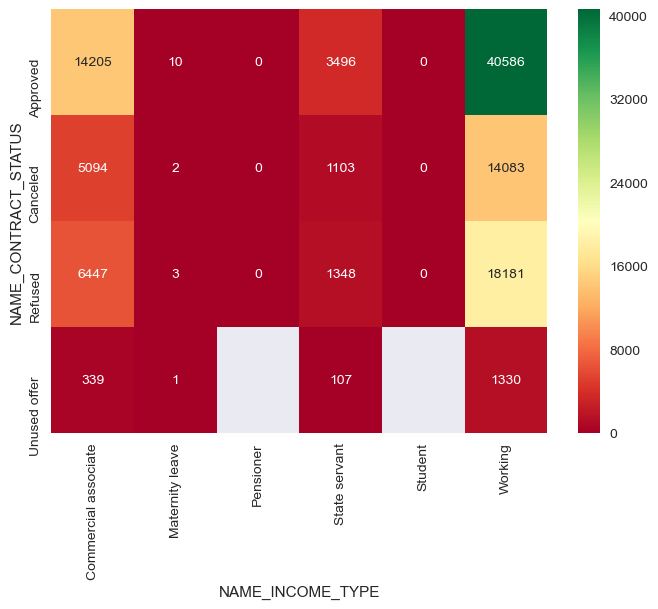

In [122]:
sns.heatmap(res, annot=True, cmap="RdYlGn", fmt="g")
plt.show()

In the above analysis, the majority of defaults have come from working applicants with approved status. For Unused, Refused and canceled form the working clients the refused/canceled loans are more.

#### NAME_CONTRACT_STATUS vs NAME_INCOME_TYPE vs AMT_CREDIT_y

In [123]:
# Plotting a heatmap for NAME_CONTRACT_STATUS with AMT_CREDIT_y
res=pd.pivot_table(data=df3, index='NAME_CONTRACT_STATUS', columns='NAME_INCOME_TYPE', values="AMT_CREDIT_y")
res

NAME_INCOME_TYPE      Commercial associate  Maternity leave      Pensioner  \
NAME_CONTRACT_STATUS                                                         
Approved                     229154.278812         410632.2  138488.113636   
Canceled                      23939.197954              0.0       0.000000   
Refused                      416690.789802         835986.0  550781.480769   
Unused offer                  76238.011517         157099.5            NaN   

NAME_INCOME_TYPE      State servant   Student        Working  
NAME_CONTRACT_STATUS                                          
Approved              212806.393723  196853.4  181947.010005  
Canceled               32387.295012       0.0   26797.920819  
Refused               431344.091593   19786.5  342722.026199  
Unused offer           71327.908281       NaN   67124.190340

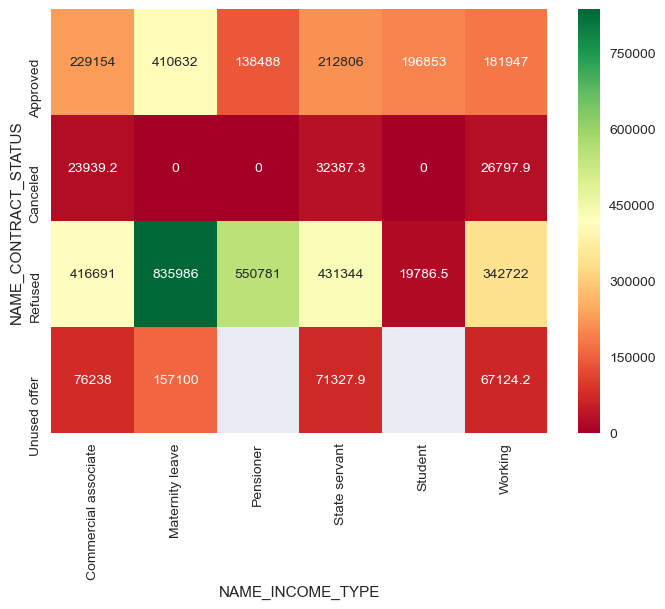

In [124]:
sns.heatmap(res, annot=True, cmap="RdYlGn", fmt="g")
plt.show()

In the above analysis, the majority of defaults have come from maternity leave applicants with refused status.